# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

The data is provided as a comma separated file.

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [ ]:
!ls -lh

We see that we have 5 million datapoints.

In [ ]:
!wc -l SUSY.csv

We create a new file of the first half million. This is sufficient for our needs in this lab:

In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
ls -lh

In [ ]:
! wc -l SUSY-small.csv

Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [1]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [2]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [3]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [4]:
FeatureNames

['M_Delta_R',
 'dPhi_r_b',
 'S_R',
 'M_R',
 'M_TR_2',
 'R',
 'axial_MET',
 'MET_rel',
 'MT2',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [6]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [7]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [8]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


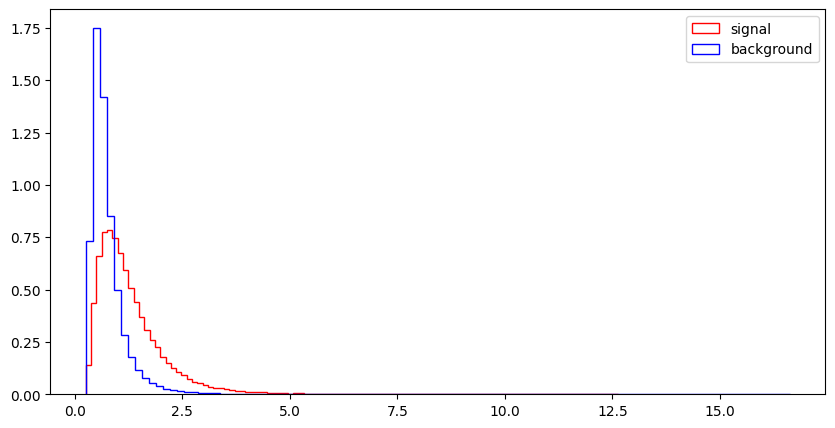

l_1_eta


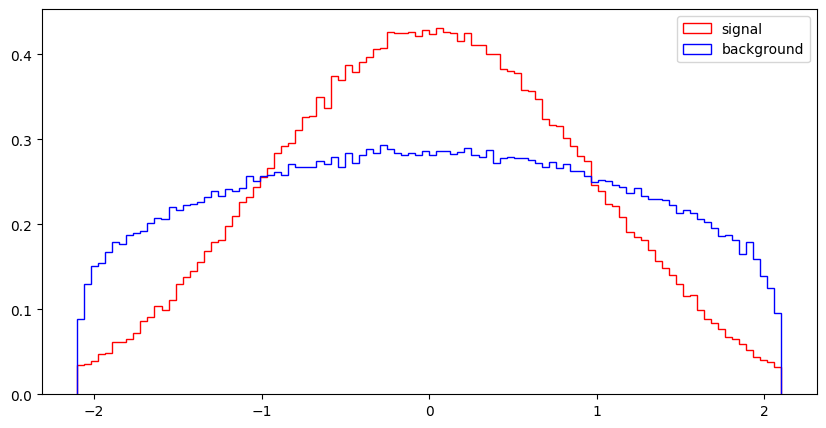

l_1_phi


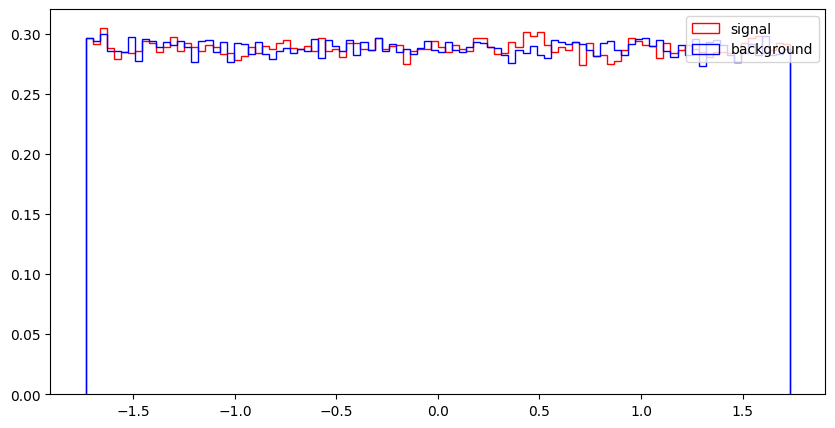

l_2_pT


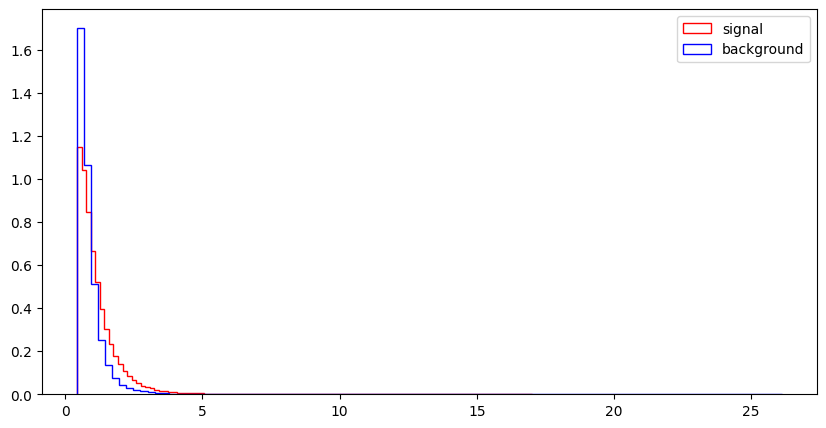

l_2_eta


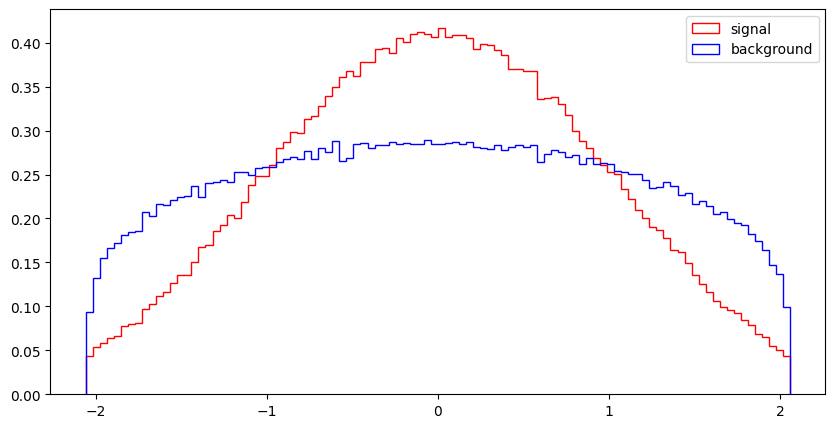

l_2_phi


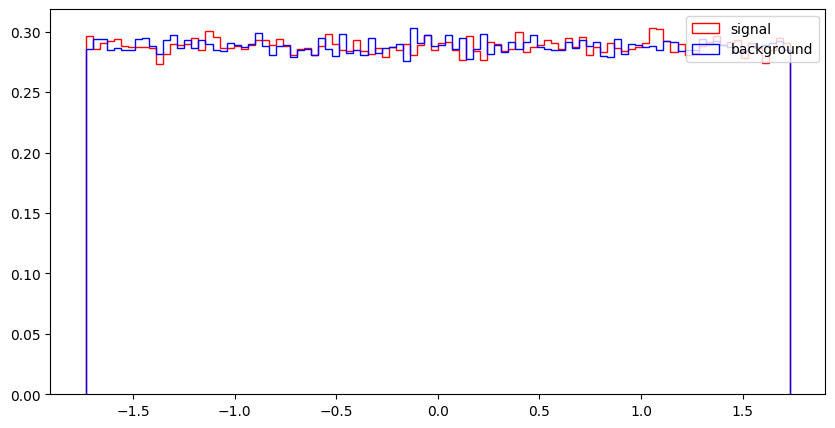

MET


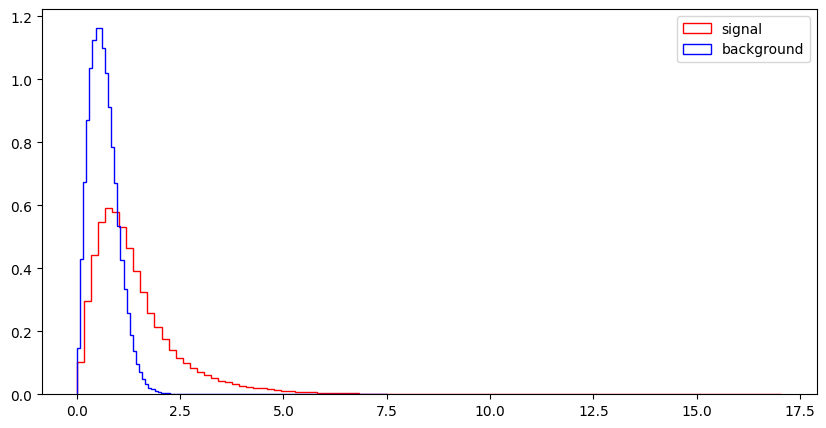

MET_phi


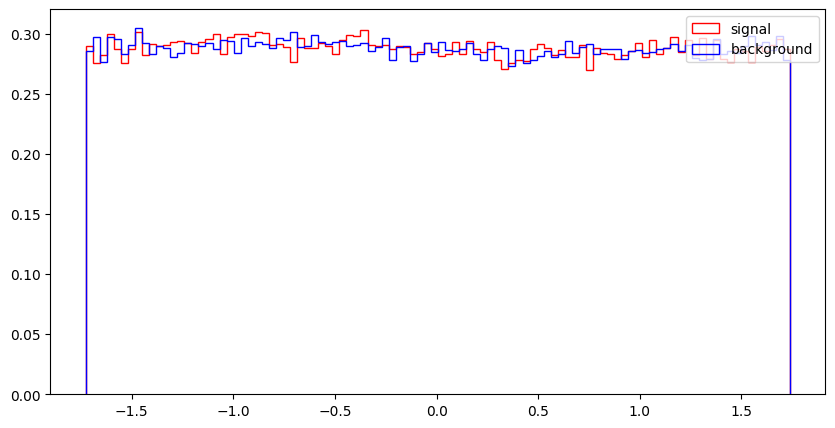

MET_rel


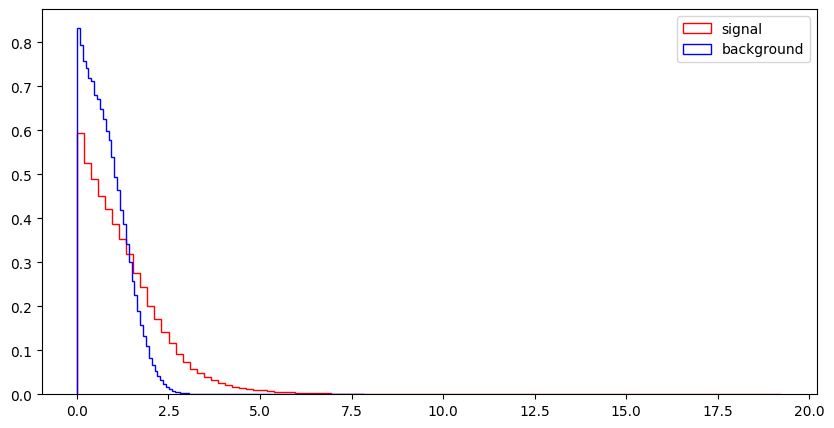

axial_MET


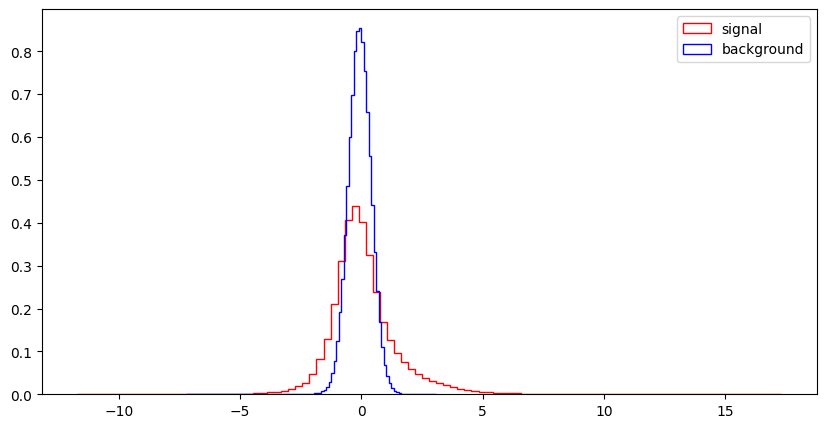

M_R


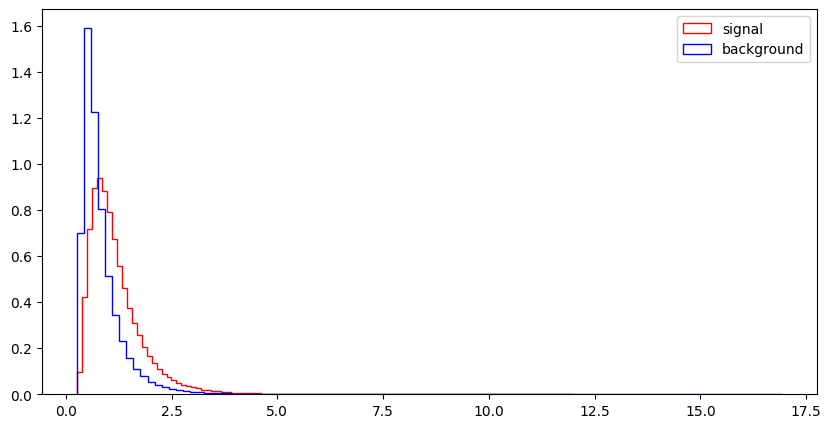

M_TR_2


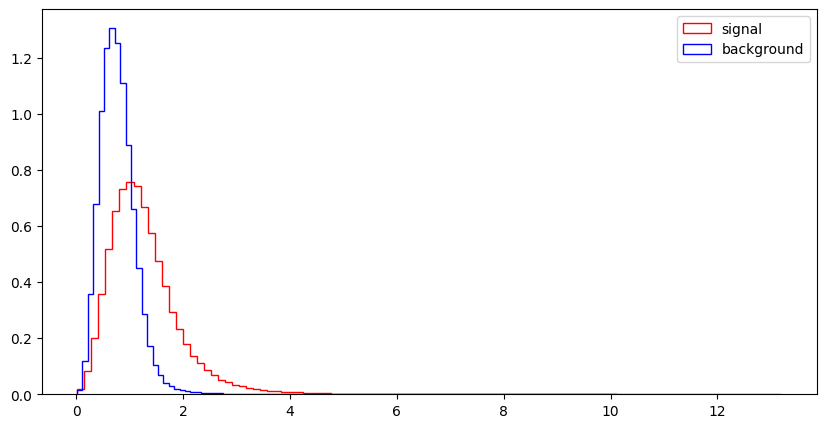

R


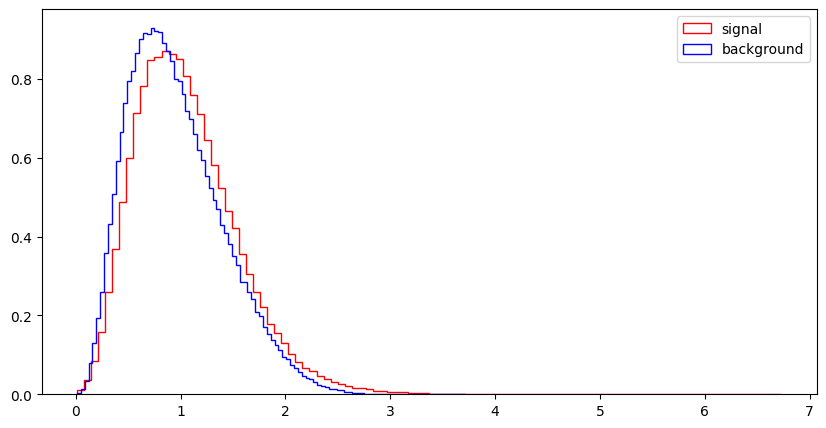

MT2


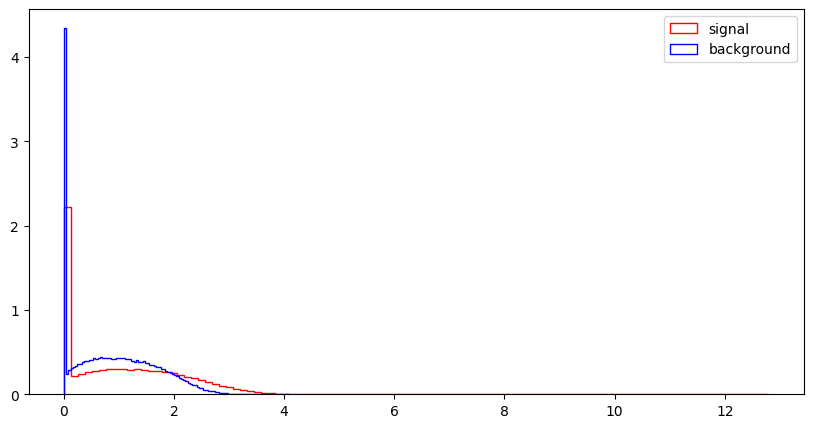

S_R


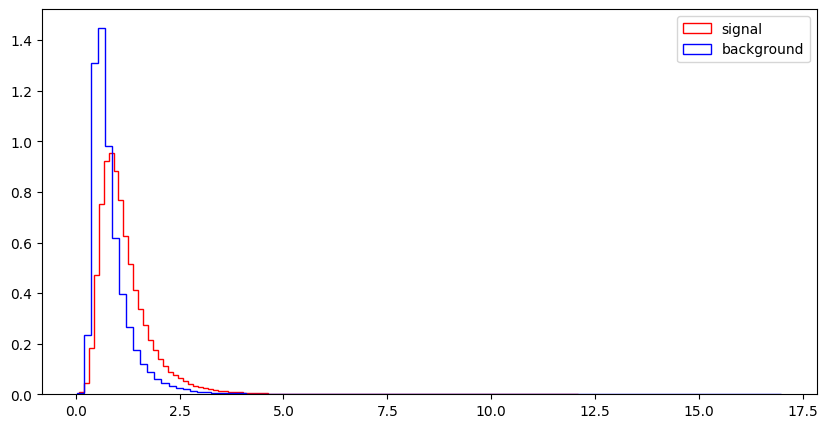

M_Delta_R


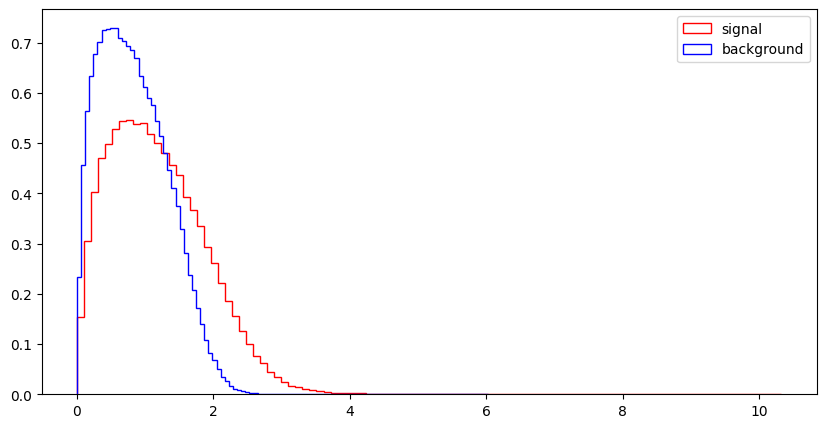

dPhi_r_b


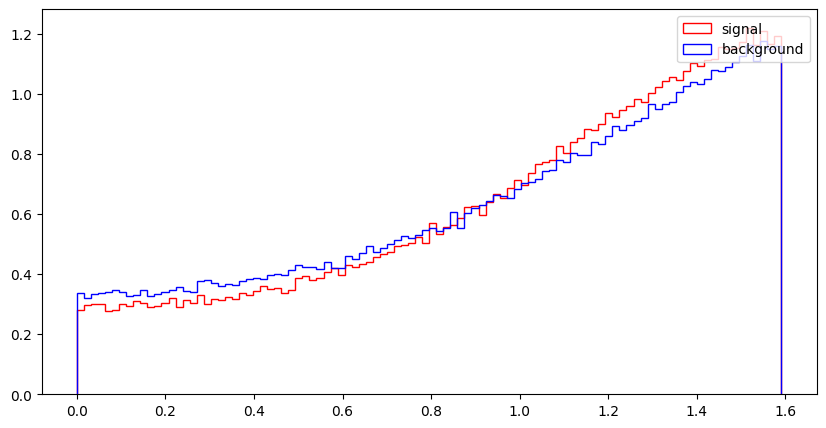

cos_theta_r1


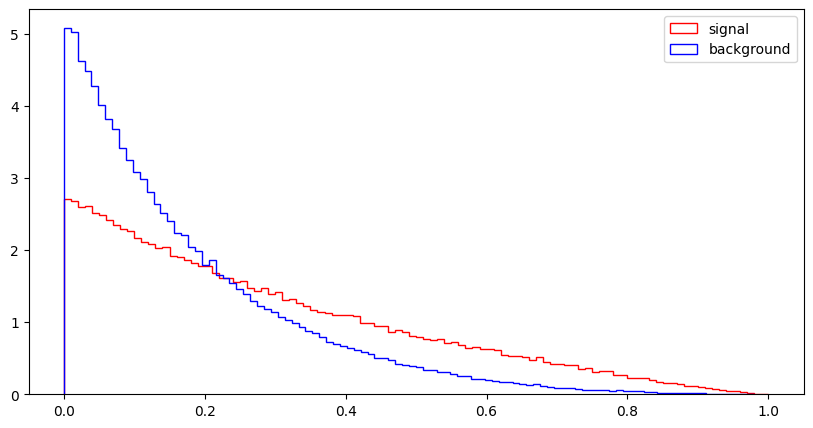

In [9]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

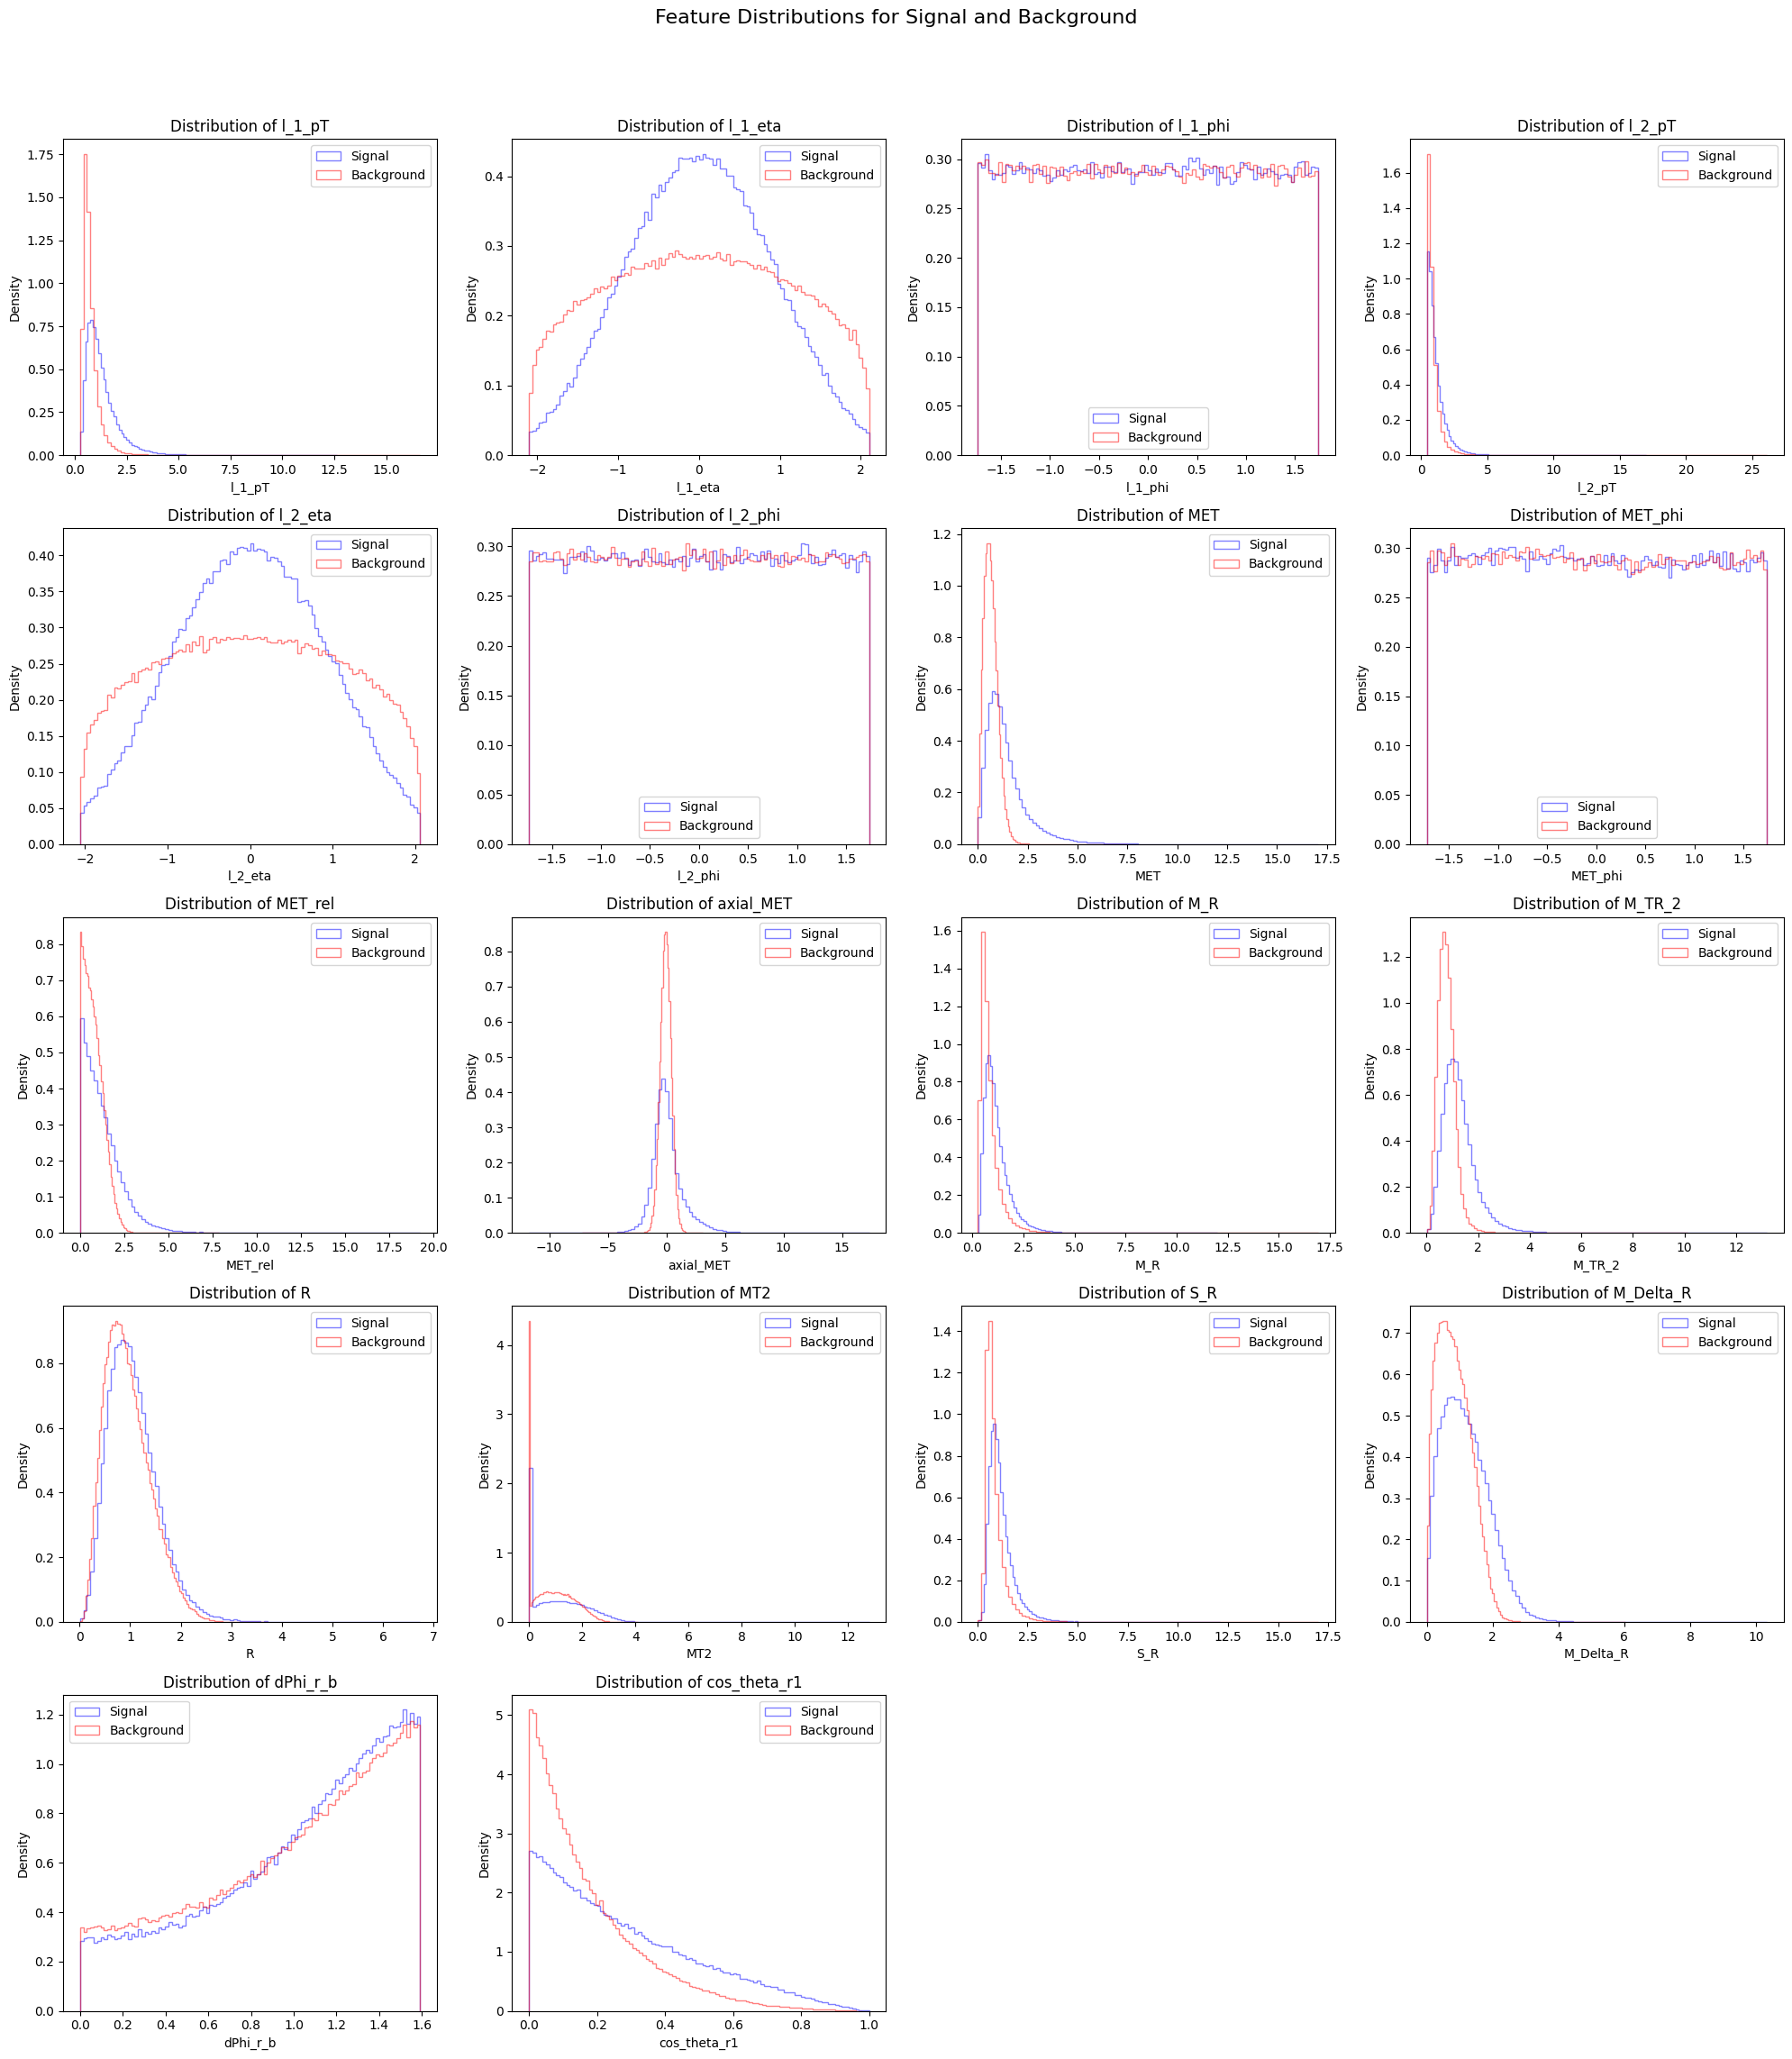

In [10]:
features = ['l_1_pT', 'l_1_eta', 'l_1_phi','l_2_pT','l_2_eta','l_2_phi','MET','MET_phi','MET_rel', 'axial_MET','M_R','M_TR_2','R','MT2','S_R','M_Delta_R','dPhi_r_b','cos_theta_r1']  
fig, axs = plt.subplots(5,4, figsize=(20, 24))

for i, feature in enumerate(features):
    ax = axs.flat[i]  #subplots in 1-d 
    
    
    #hist for each features
    ax.hist(df_sig[feature], bins=100, histtype="step", alpha=0.5, color='blue', label='Signal', density=True)
    ax.hist(df_bkg[feature], bins=100, histtype="step", alpha=0.5, color='red', label='Background', density=True)
    
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()

#this removes subplots
for j in range(i + 1, len(axs.flat)):
    fig.delaxes(axs.flat[j])

fig.suptitle("Feature Distributions for Signal and Background", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [11]:
#part a
import matplotlib.pyplot as plt

def create_pair_plots(data, feature_list, title="Pair Plot"):
    num_features = len(feature_list)
    fig, axs = plt.subplots(num_features, num_features, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    #loop for each feature
    for i in range(num_features):
        for j in range(num_features):
            if i == j: #diagonal: histogram for the feature with itself
                axs[i, j].hist(data[feature_list[i]], bins=30, color='red', alpha=0.7)
                axs[i, j].set_xlabel(feature_list[i])
                axs[i, j].set_ylabel("Density")
            else: #other pair plots outside the diagonal: scatter plot for these pairs
                axs[i, j].scatter(data[feature_list[j]], data[feature_list[i]], s=1, alpha=0.02, color='blue')
                axs[i, j].set_xlabel(feature_list[j])
                axs[i, j].set_ylabel(feature_list[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

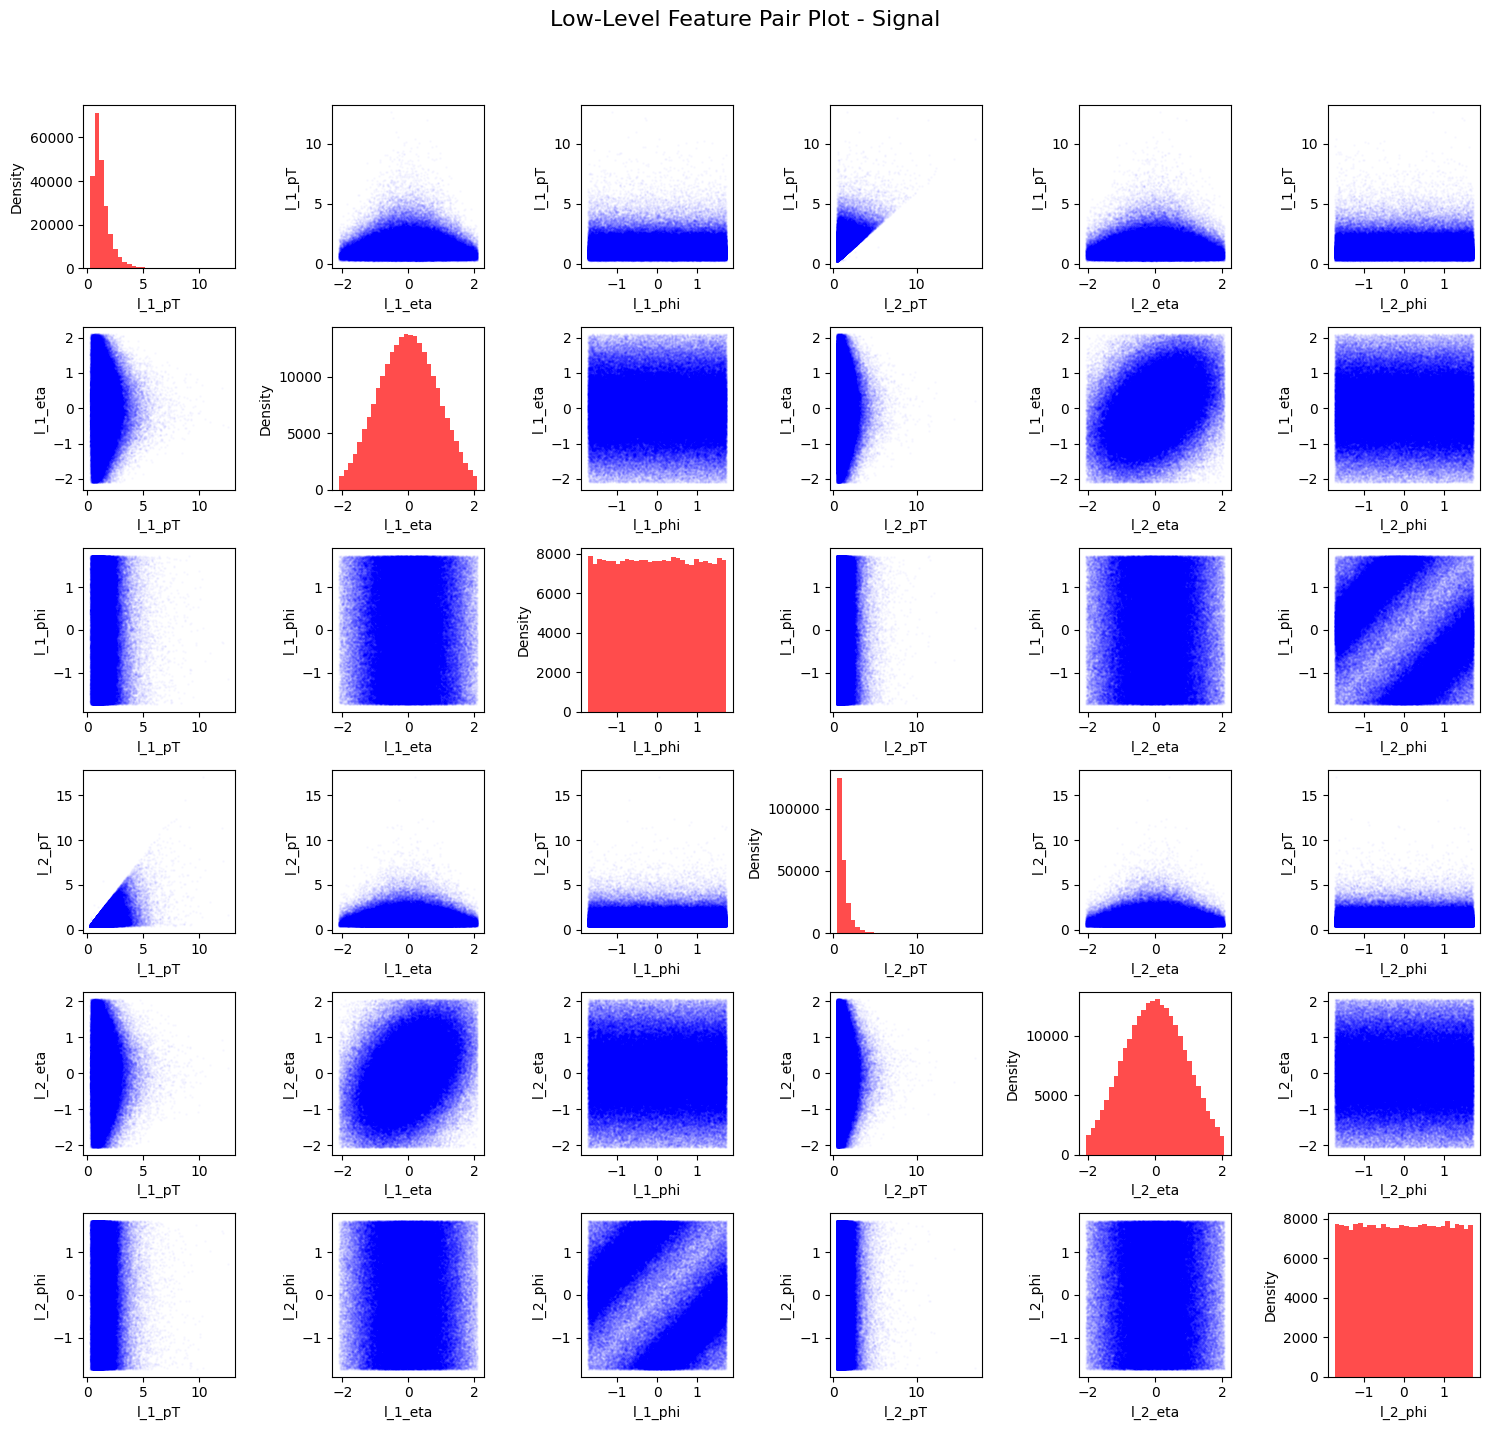

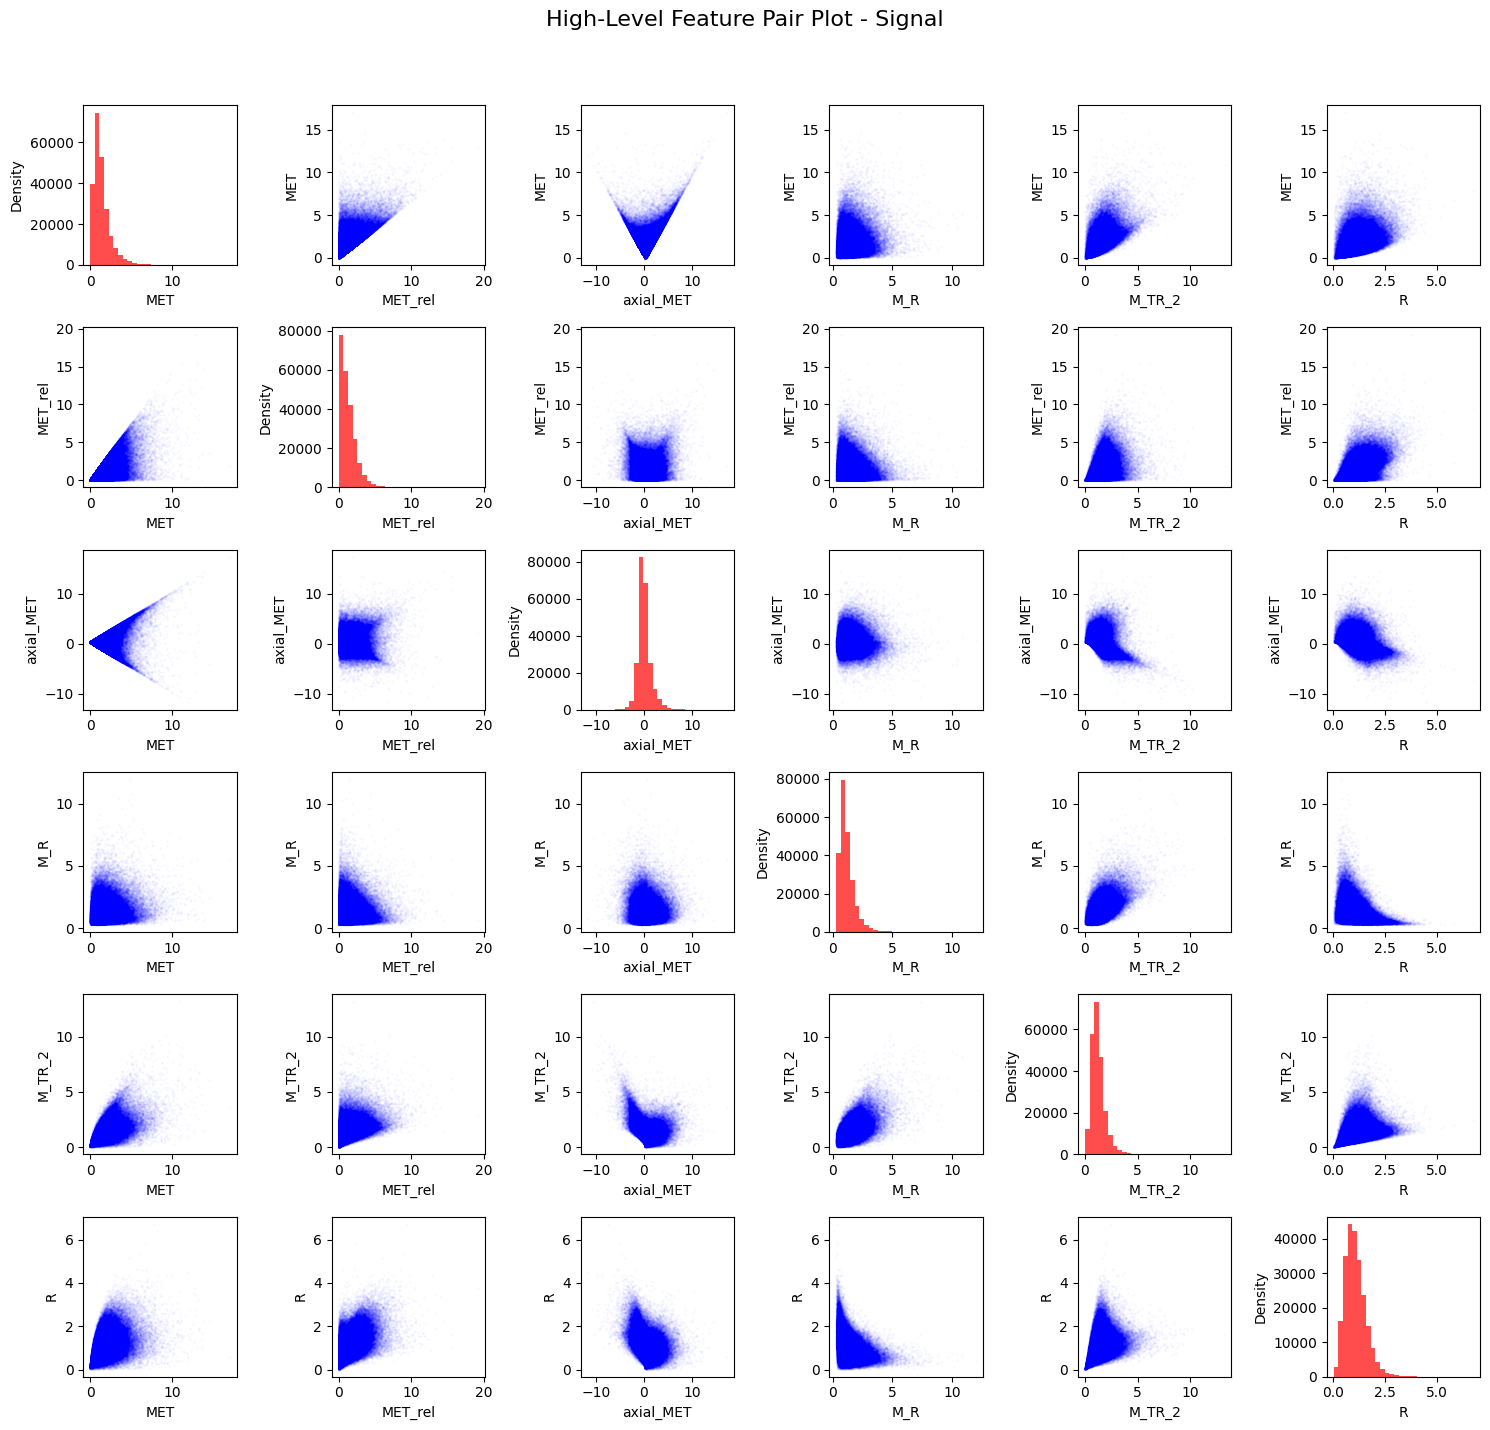

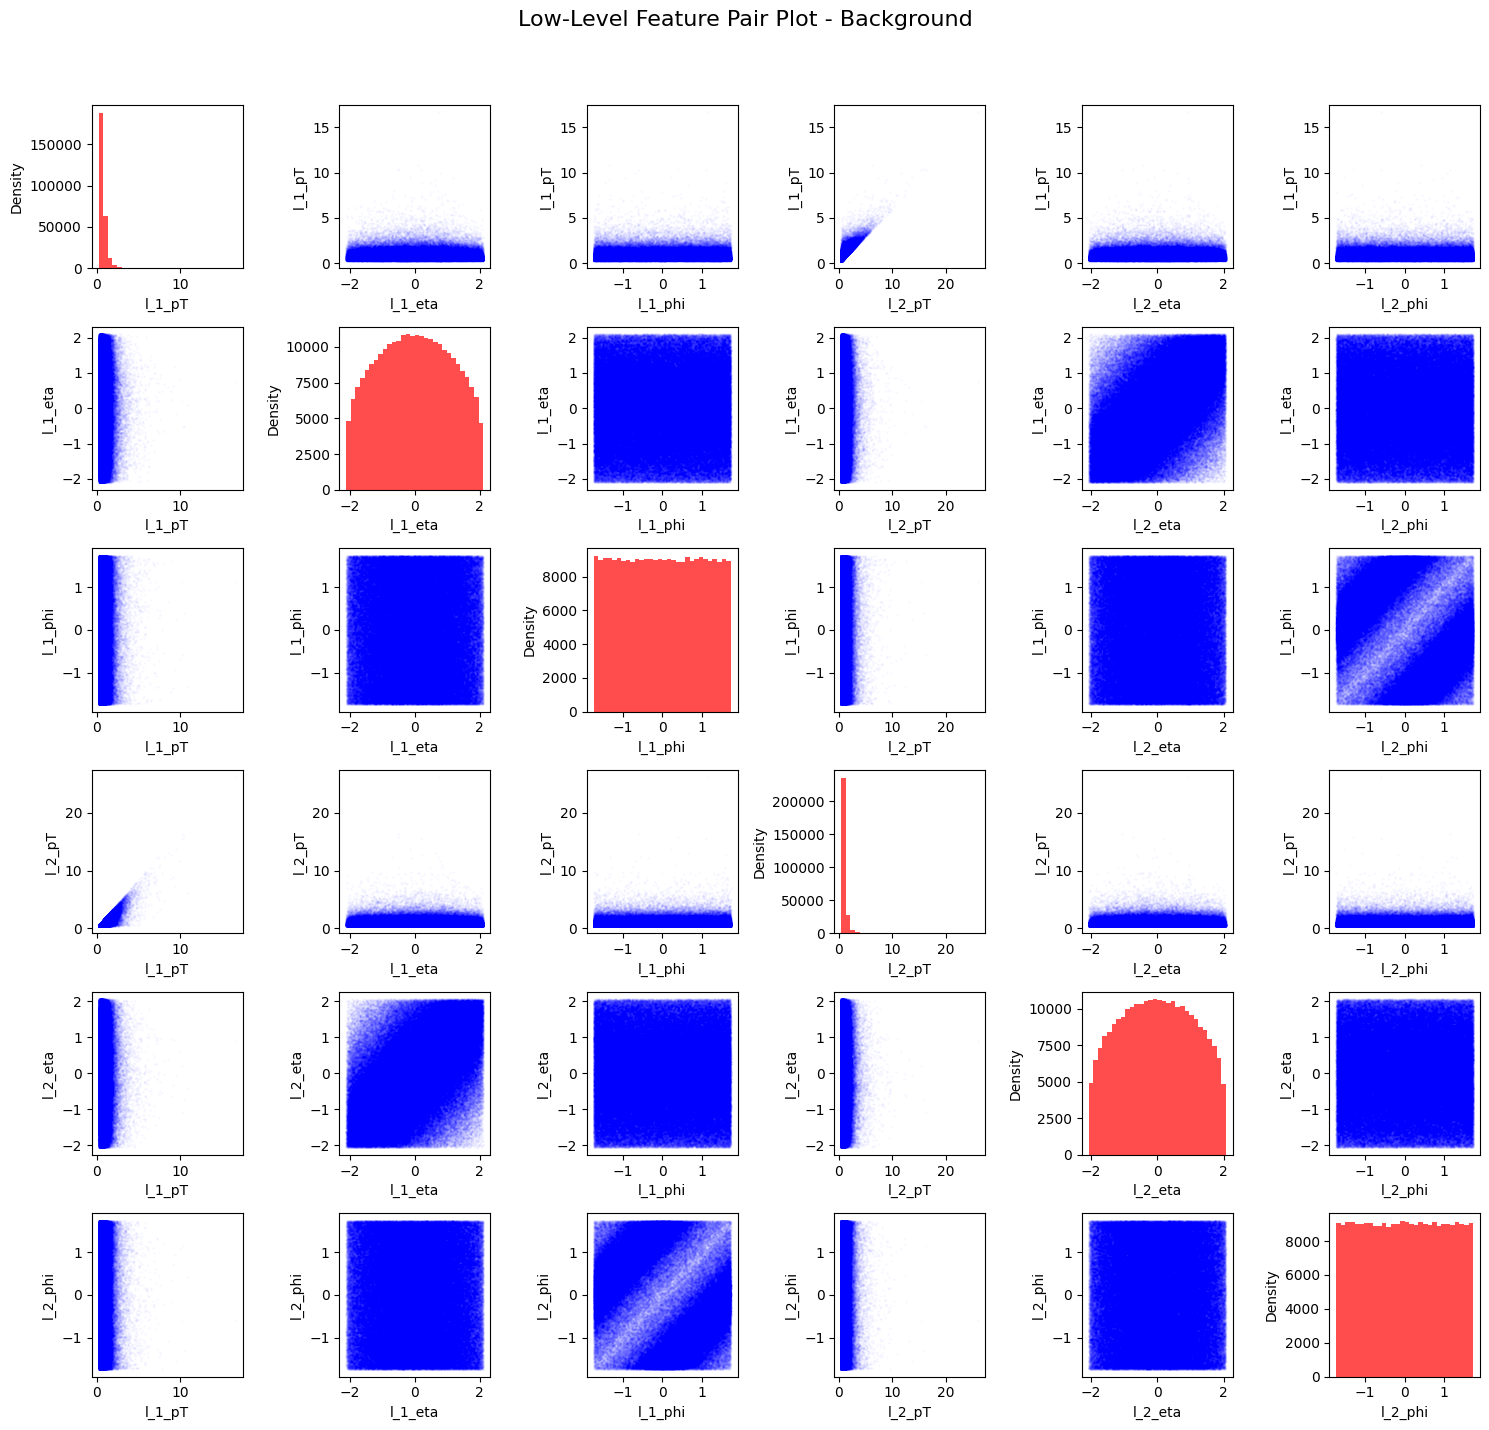

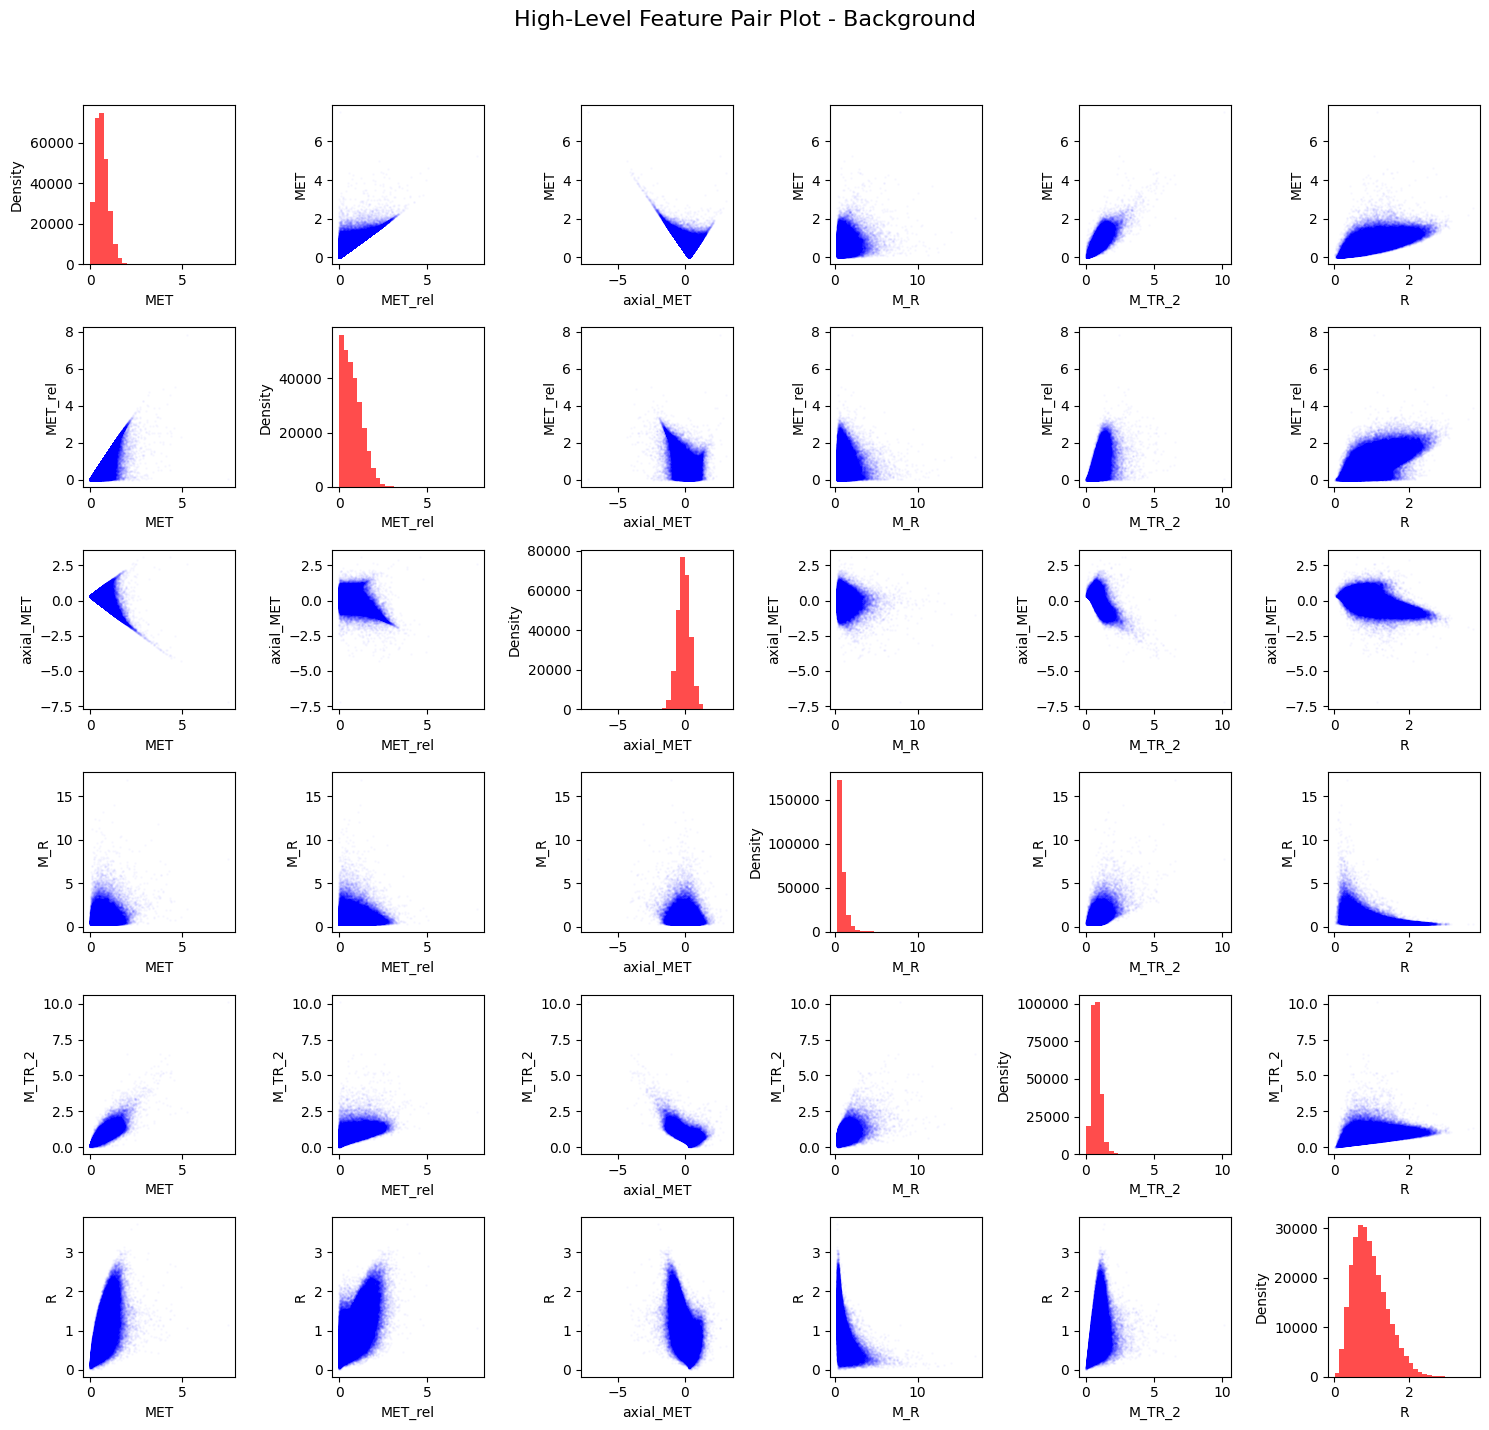

In [12]:
low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi']
high_level_features = ['MET', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R']

create_pair_plots(df_sig, low_level_features, title="Low-Level Feature Pair Plot - Signal")
create_pair_plots(df_sig, high_level_features, title="High-Level Feature Pair Plot - Signal")
create_pair_plots(df_bkg, low_level_features, title="Low-Level Feature Pair Plot - Background")
create_pair_plots(df_bkg, high_level_features, title="High-Level Feature Pair Plot - Background")

In [13]:
#part b
def pairplots_and_hexbin(data, feature_list, gridsize=30, sample_size=1000, title=""):
    num_features = len(feature_list)
    fig, axs = plt.subplots(num_features, num_features, figsize=(15, 15))
    if title:
        fig.suptitle(title, fontsize=16)

    if len(data) > sample_size:
        data = data.sample(sample_size)


    for i in range(num_features):
        for j in range(num_features):
            if i == j:
                #Diagonal plots are the histogram plot
                axs[i, j].hist(data[feature_list[i]], bins=30, color='pink', alpha=0.7)
                axs[i, j].set_xlabel(feature_list[i])
                axs[i, j].set_ylabel("Density")
            else:
                #outside the diagonal: hexbin plot
                axs[i, j].hexbin(data[feature_list[j]], data[feature_list[i]], gridsize=gridsize, cmap="Blues")
                axs[i, j].set_xlabel(feature_list[j])
                axs[i, j].set_ylabel(feature_list[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


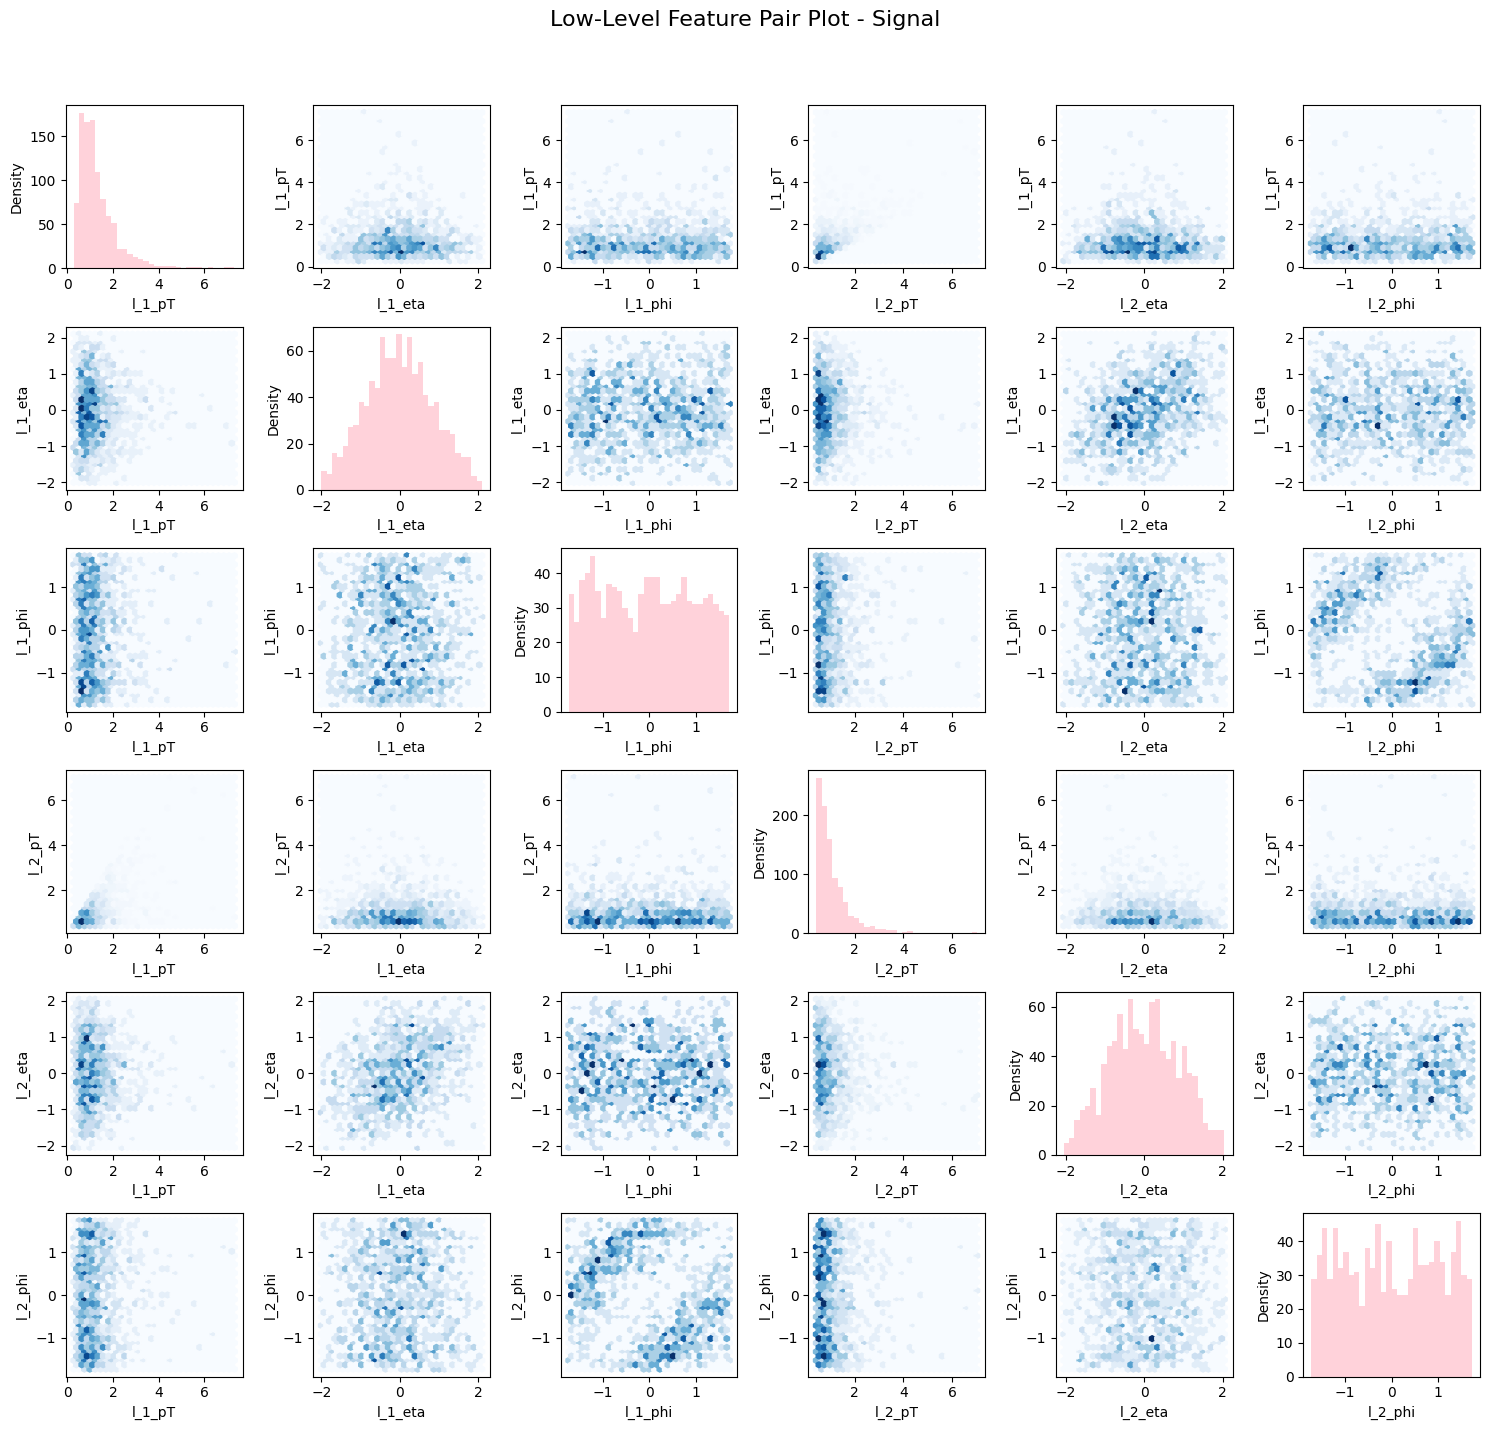

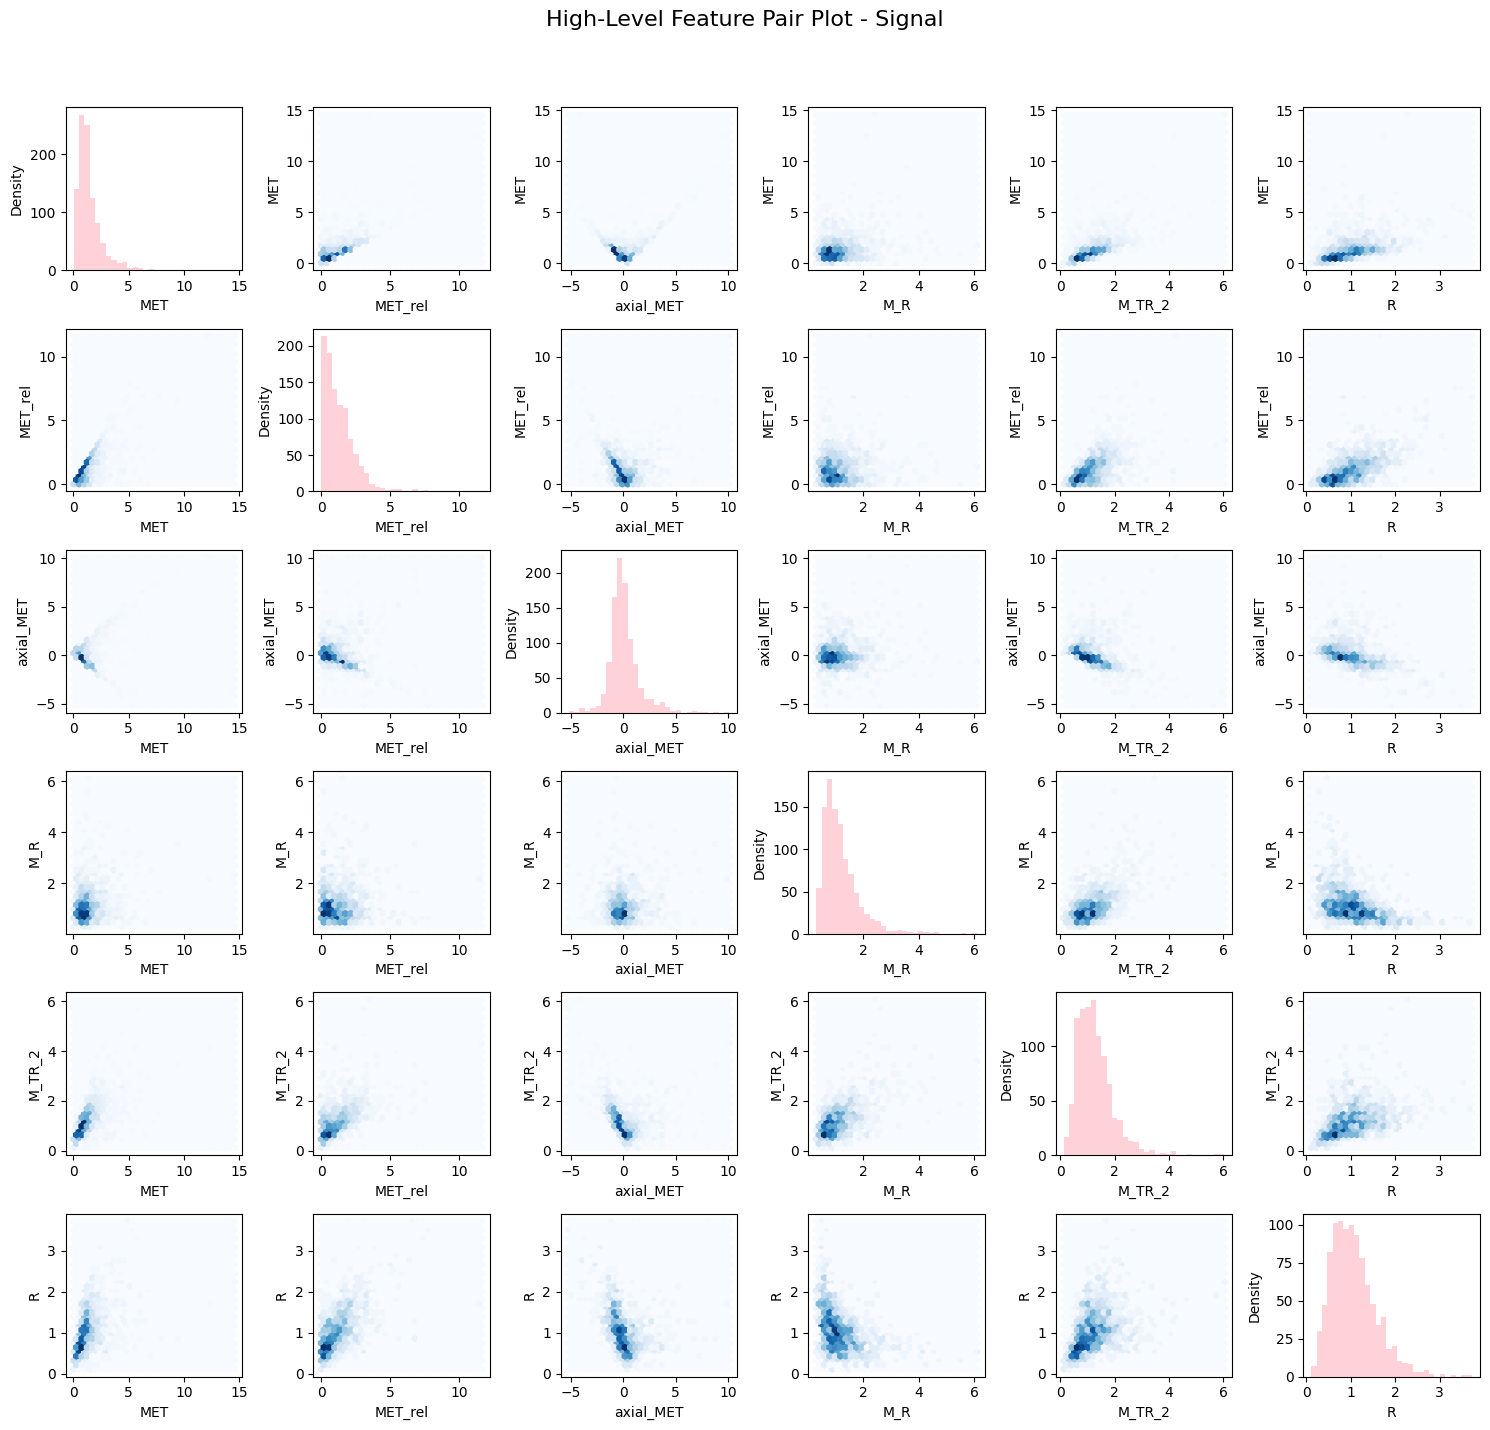

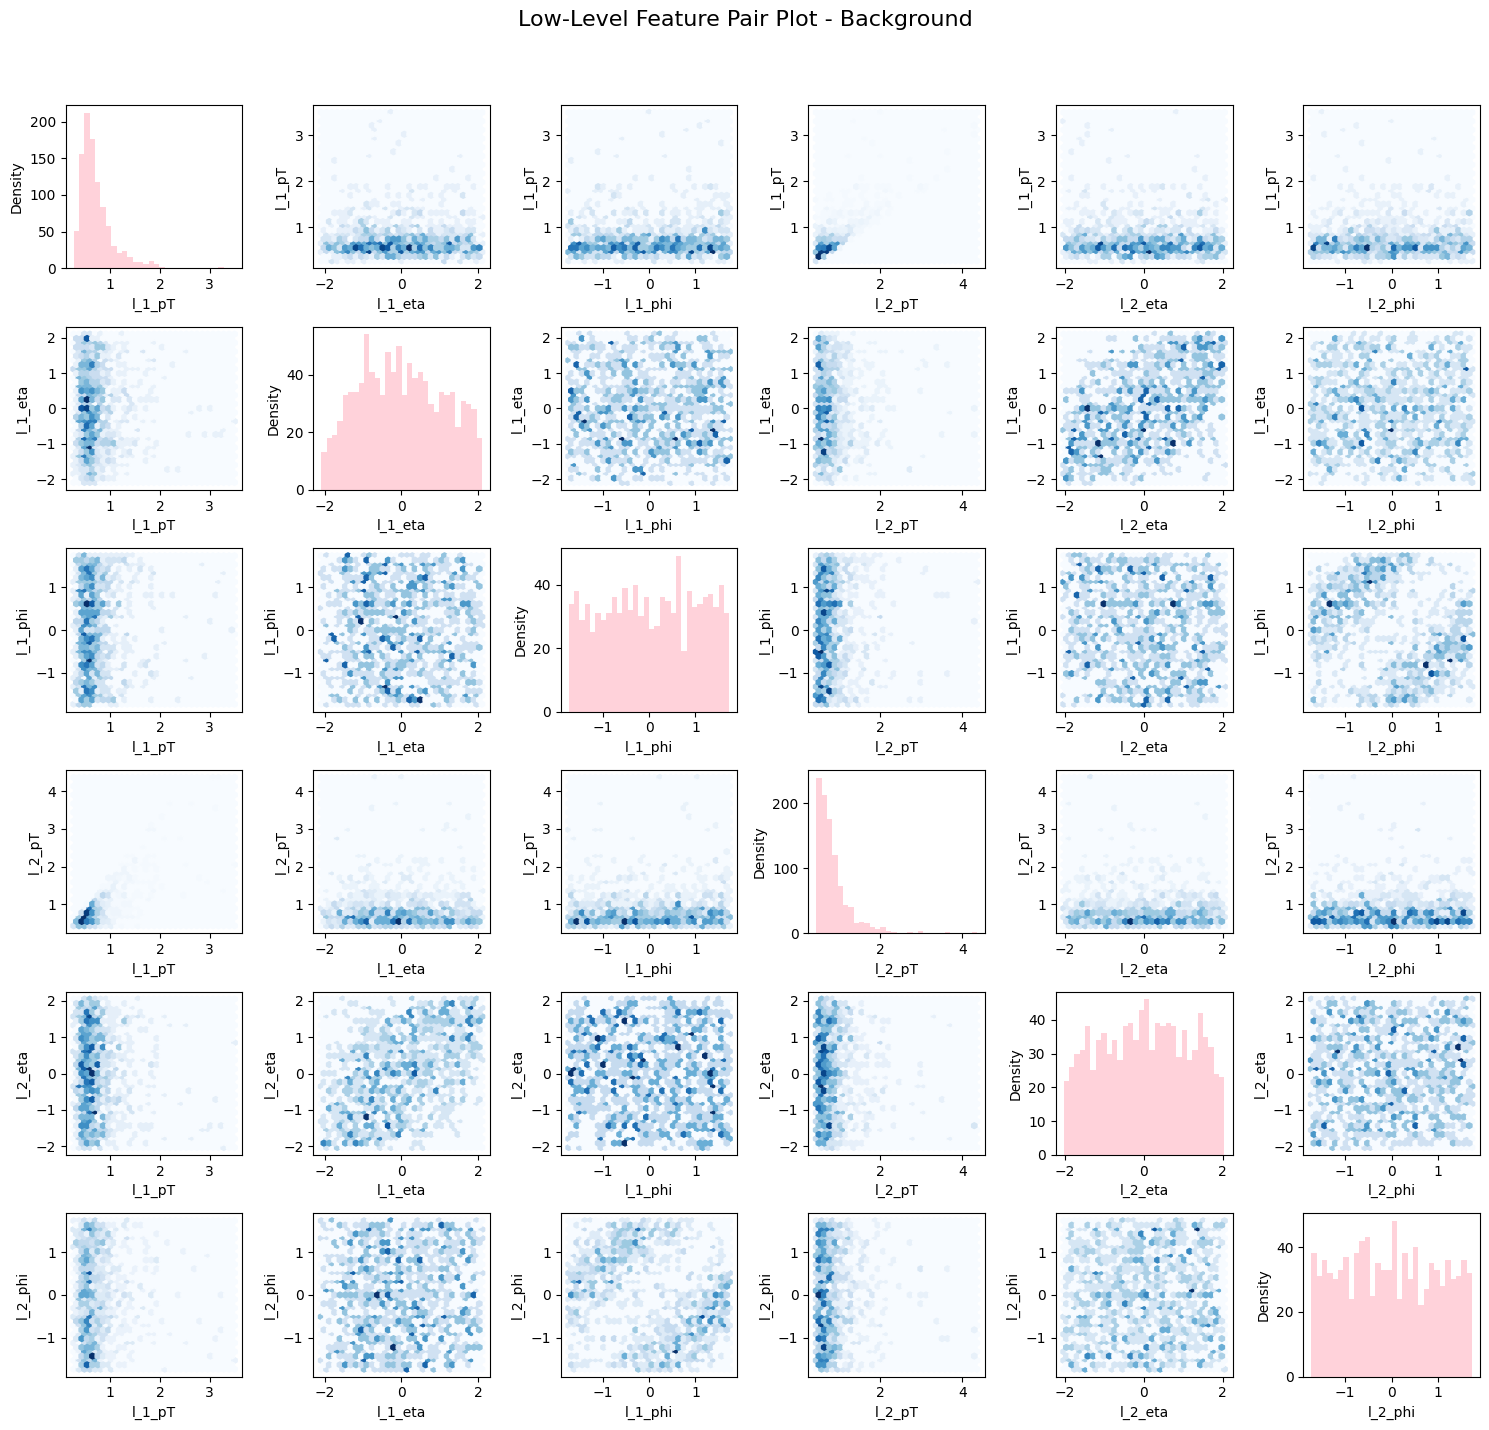

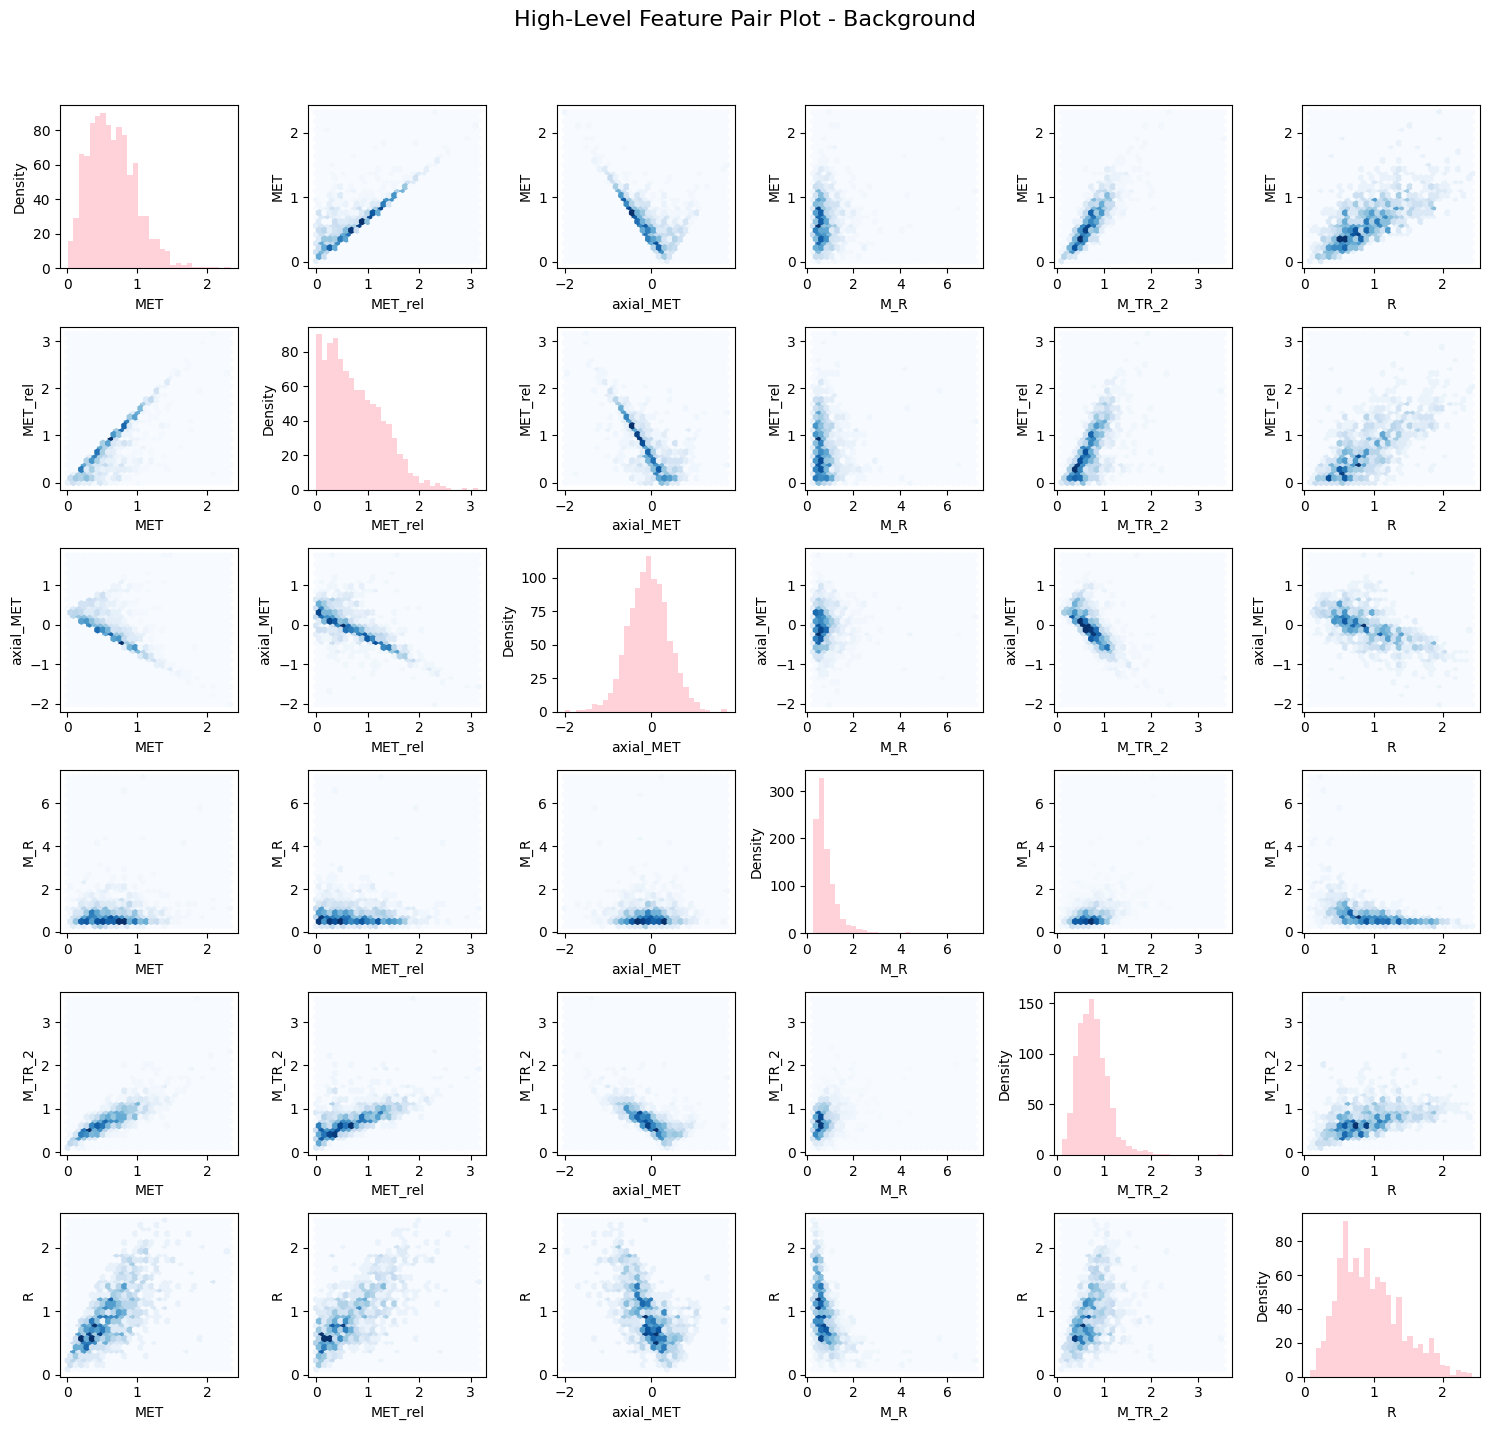

In [14]:
pairplots_and_hexbin(df_sig, low_level_features, title="Low-Level Feature Pair Plot - Signal")
pairplots_and_hexbin(df_sig, high_level_features, title="High-Level Feature Pair Plot - Signal")
pairplots_and_hexbin(df_bkg, low_level_features, title="Low-Level Feature Pair Plot - Background")
pairplots_and_hexbin(df_bkg, high_level_features, title="High-Level Feature Pair Plot - Background")

Part C - 

The best observable features for separating signal from background are high-level features. 

As we can see from our visuals, there is a clearer relaitonship seen in the high-level feature 



### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [15]:
#part b

#example data columns
low_level_ft = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi']
high_level_ft = ['MET', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R']

all_features = low_level_ft + high_level_ft

#convert parts of df to numpy arrays
all_data = df[all_features].to_numpy()
low_data = df[low_level_ft].to_numpy()
high_data = df[high_level_ft].to_numpy()

#covariance and correlation for ALL 
cov_matrix_all = np.cov(all_data, rowvar=False)
corr_matrix_all = np.corrcoef(all_data, rowvar=False)

print("Covariance Matrix for All Observables:")
print(cov_matrix_all)

print("\nCorrelation Matrix for All Observables:")
print(corr_matrix_all)

#LOW LEVEL - covariance and corr 
cov_matrix_low = np.cov(low_data, rowvar=False)
corr_matrix_low = np.corrcoef(low_data, rowvar=False)

print("\nCovariance Matrix for Low-Level Features:")
print(cov_matrix_low)

print("\nCorrelation Matrix for Low-Level Features:")
print(corr_matrix_low)

#HIGH LEVEL - covariance and corr
cov_matrix_high = np.cov(high_data, rowvar=False)
corr_matrix_high = np.corrcoef(high_data, rowvar=False)

print("\nCovariance Matrix for High-Level Features:")
print(cov_matrix_high)

print("\nCorrelation Matrix for High-Level Features:")
print(corr_matrix_high)


Covariance Matrix for All Observables:
[[ 4.67481925e-01 -3.96674207e-04  7.66214265e-05  3.05037988e-01
  -3.48826988e-04  7.37336647e-04  2.28434336e-01  9.75240349e-02
  -9.73253567e-03  3.64432455e-01  2.87223483e-01 -5.97024601e-02]
 [-3.96674207e-04  1.00430144e+00 -8.57630732e-04 -1.62905654e-04
   4.08312894e-01 -1.04201049e-03 -2.14697798e-03 -1.37057212e-03
  -1.10889241e-03 -5.53826632e-04 -6.68920291e-04  3.01299870e-04]
 [ 7.66214265e-05 -8.57630732e-04  1.00397336e+00  1.31296001e-03
   2.50714928e-04 -2.66810178e-01  7.66365893e-04  7.06206018e-04
  -1.87269105e-03  1.06306621e-03  8.68782730e-04  2.01595554e-04]
 [ 3.05037988e-01 -1.62905654e-04  1.31296001e-03  4.25490163e-01
  -5.75571383e-04  1.55883996e-04  7.94518800e-02 -5.33893328e-04
   5.13298627e-02  3.25434472e-01  1.62941064e-01 -9.93510956e-02]
 [-3.48826988e-04  4.08312894e-01  2.50714928e-04 -5.75571383e-04
   1.00626446e+00  4.41588261e-04  3.81652056e-04  1.08429106e-03
  -7.56451376e-04 -6.07670595e-04

In [16]:
# part c
from tabulate import tabulate
from IPython.display import display, HTML



new_df = pd.DataFrame(all_data, columns=all_features)

In [17]:
#covariance and correlation matrices
cov_matrix_all = np.cov(all_data, rowvar=False) #using numpy for matrix calculations
corr_matrix_all = np.corrcoef(all_data, rowvar=False)

#function to format matrix as a table
def display_matrix(matrix, feature_list, title):
    rounded_matrix = np.round(matrix, decimals=4)  #round to 4 decimal places
    table = tabulate(rounded_matrix, headers=feature_list, showindex=feature_list, tablefmt="html")
    display(HTML(f"<h3>{title}</h3>")) #displays the title as an HTML header 
    display(HTML(table)) #displays the HTML table with values and features

#covariance and corr matrices for ALL FEATURES
display_matrix(cov_matrix_all, all_features, "Covariance Matrix for All Observables")
display_matrix(corr_matrix_all, all_features, "Correlation Matrix for All Observables")

#matrices: low-level and high-level features
cov_matrix_low = np.cov(low_data, rowvar=False)
corr_matrix_low = np.corrcoef(low_data, rowvar=False)
cov_matrix_high = np.cov(high_data, rowvar=False)
corr_matrix_high = np.corrcoef(high_data, rowvar=False)

#tables for low-level and high-level features
display_matrix(cov_matrix_low, low_level_features, "Covariance Matrix for Low-Level Features")
display_matrix(corr_matrix_low, low_level_features, "Correlation Matrix for Low-Level Features")
display_matrix(cov_matrix_high, high_level_features, "Covariance Matrix for High-Level Features")
display_matrix(corr_matrix_high, high_level_features, "Correlation Matrix for High-Level Features")

Hint: Example code for embedding a `tabulate` table into a notebook:

In [18]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [19]:
from tabulate import tabulate

In [20]:
#part d
low_level_ft = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi']
high_level_ft = ['MET', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R']

def calc_display_cov_corr(df, low_level_ft, high_level_ft):
    all_features = low_level_ft + high_level_ft
    
    #arrays
    all_data = df[all_features].to_numpy()
    low_data = df[low_level_ft].to_numpy()
    high_data = df[high_level_ft].to_numpy()
    
    #cov and corr matrices for all features
    cov_matrix_all = np.cov(all_data, rowvar=False)
    corr_matrix_all = np.corrcoef(all_data, rowvar=False)
    
    #cov and corr matrices for low-level ft
    cov_matrix_low = np.cov(low_data, rowvar=False)
    corr_matrix_low = np.corrcoef(low_data, rowvar=False)
    
    #cov and corr matrices for high-level ft
    cov_matrix_high = np.cov(high_data, rowvar=False)
    corr_matrix_high = np.corrcoef(high_data, rowvar=False)
    
    #matrices display using tabulate
    def display_matrix(matrix, headers, title):
        table = tabulate(matrix, headers=headers, floatfmt=".4f", tablefmt="html")
        display(HTML(f"<h3>{title}</h3>"))
        display(HTML(table))
    
    #headers
    all_headers = all_features
    low_headers = low_level_ft
    high_headers = high_level_ft
    
    #displaying all matrices
    display_matrix(cov_matrix_all, all_headers, "Covariance Matrix for All Observables")
    display_matrix(corr_matrix_all, all_headers, "Correlation Matrix for All Observables")
    
    display_matrix(cov_matrix_low, low_headers, "Covariance Matrix for Low-Level Features")
    display_matrix(corr_matrix_low, low_headers, "Correlation Matrix for Low-Level Features")
    
    display_matrix(cov_matrix_high, high_headers, "Covariance Matrix for High-Level Features")
    display_matrix(corr_matrix_high, high_headers, "Correlation Matrix for High-Level Features")

In [21]:
calc_display_cov_corr(df, low_level_ft, high_level_ft)

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
#5.1
#observe and compare the distirbutions of signal and background data
#start by separating signal and background data, and plot distirbutions

In [22]:
df_sig = df[df['signal'] == 1]  #signal events
df_bkg = df[df['signal'] == 0]  #background events

In [23]:
#mean and std deviation for each feature in signal and bkg
signal_stats = df_sig[all_features].agg(['mean', 'std']).transpose()
background_stats = df_bkg[all_features].agg(['mean', 'std']).transpose()

print("Signal Statistics:")
print(signal_stats)
print("")
print("Background Statistics:")
print(background_stats)

Signal Statistics:
               mean       std
l_1_pT     1.291078  0.798660
l_1_eta    0.000824  0.866153
l_1_phi   -0.001524  1.001750
l_2_pT     1.138668  0.742778
l_2_eta    0.002487  0.889928
l_2_phi    0.000049  1.002050
MET        1.418381  1.093699
MET_rel    1.275169  1.109681
axial_MET  0.089314  1.382238
M_R        1.183651  0.661247
M_TR_2     1.268858  0.682811
R          1.056352  0.488891

Background Statistics:
               mean       std
l_1_pT     0.754449  0.437260
l_1_eta   -0.000032  1.104278
l_1_phi   -0.002395  1.002185
l_2_pT     0.881230  0.536870
l_2_eta   -0.000384  1.089818
l_2_phi   -0.000633  1.001770
MET        0.647902  0.350245
MET_rel    0.769910  0.547848
axial_MET -0.069950  0.476780
M_R        0.843879  0.548698
M_TR_2     0.772132  0.340564
R          0.953259  0.449381


In [24]:
import seaborn as sns
def plot_dist(df_sig, df_bkg, feature):
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df_sig[feature], color='blue', label='Signal', kde=True, stat="density", bins=30, alpha=0.6)
    sns.histplot(df_bkg[feature], color='red', label='Background', kde=True, stat="density", bins=30, alpha=0.6)
    
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} for Signal and Background')
    plt.legend()
    plt.show()

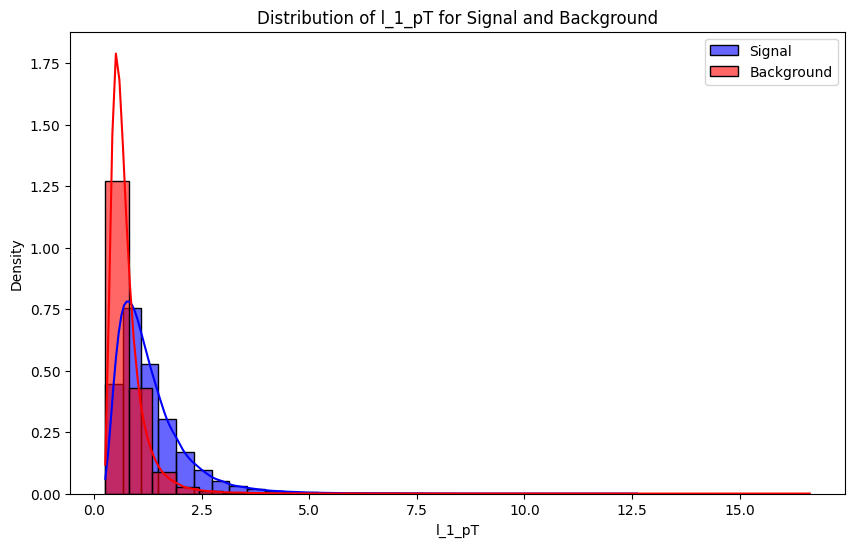

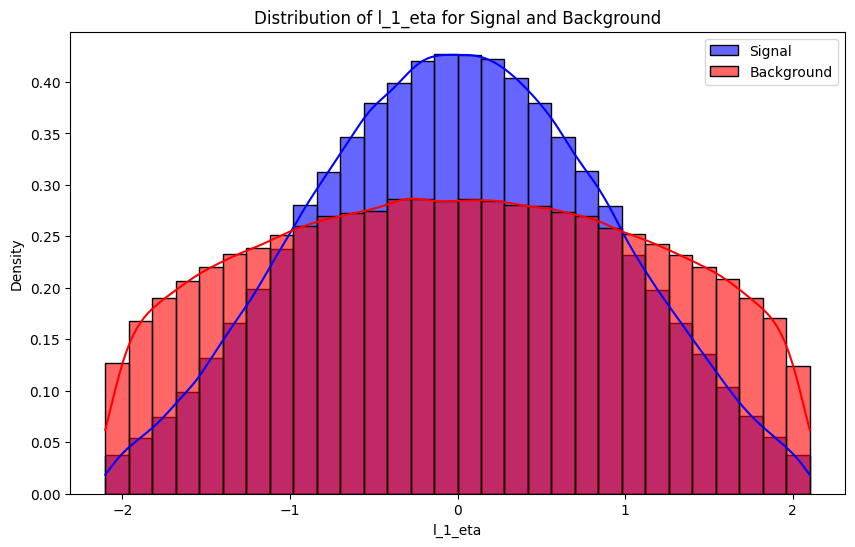

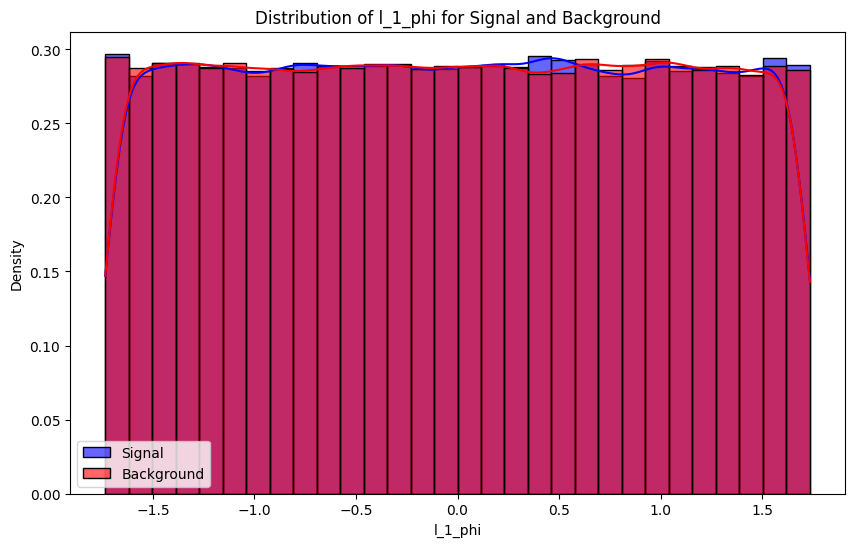

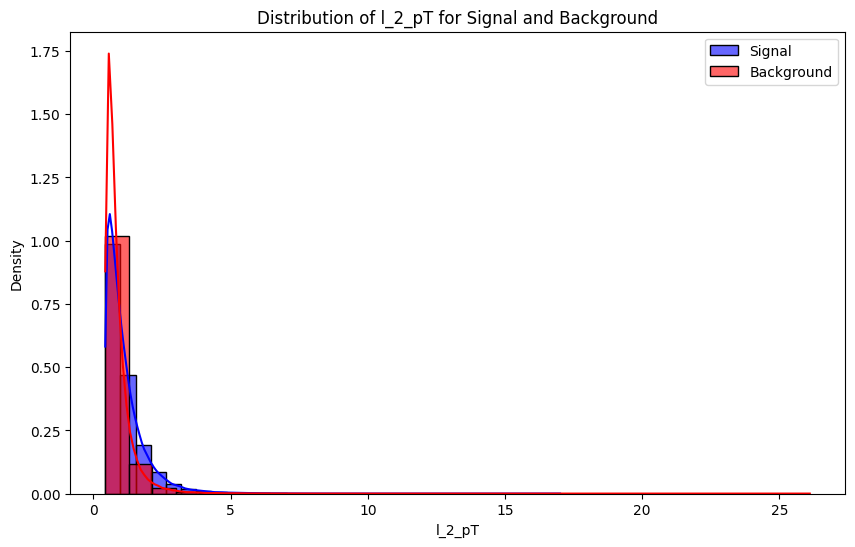

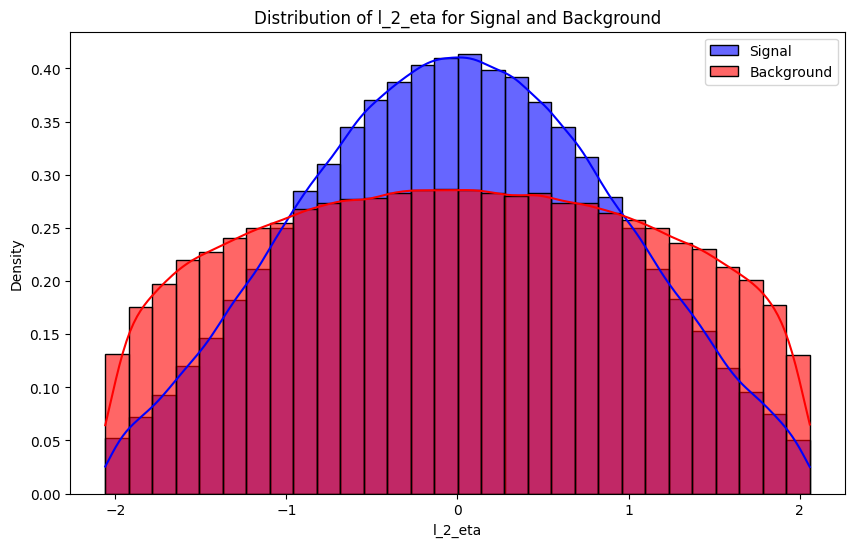

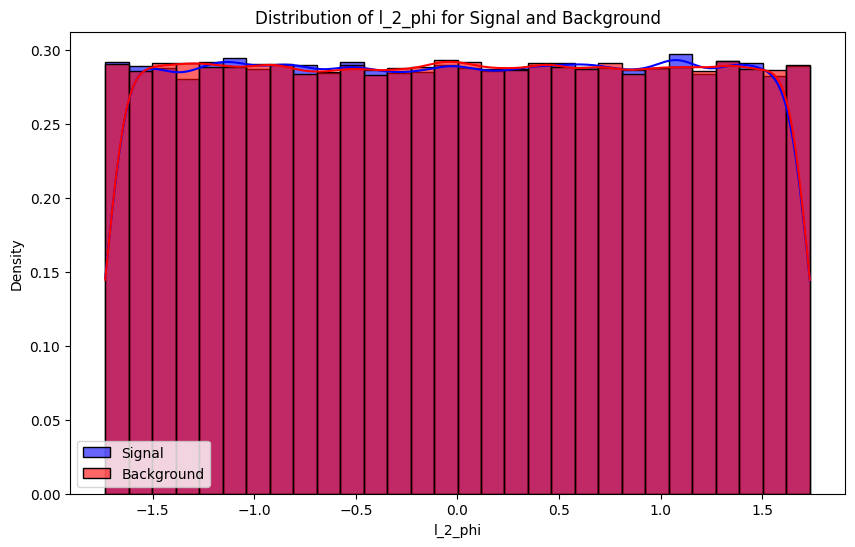

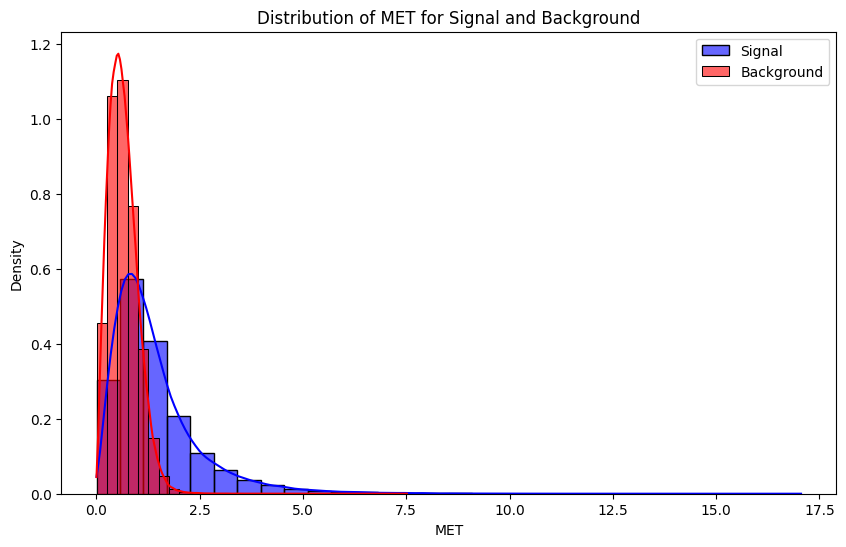

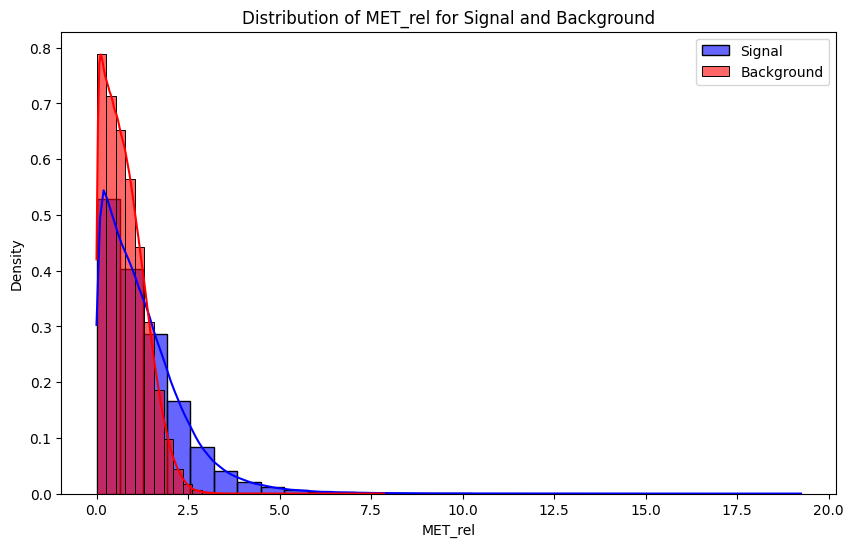

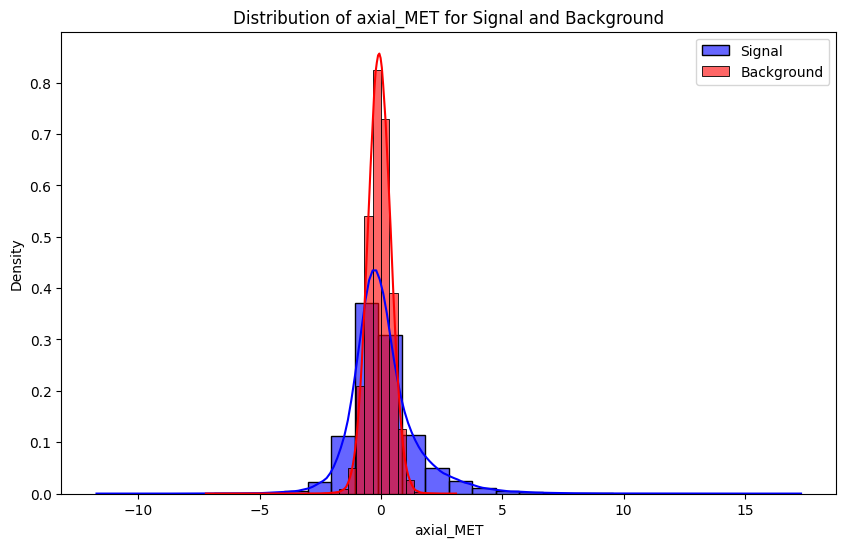

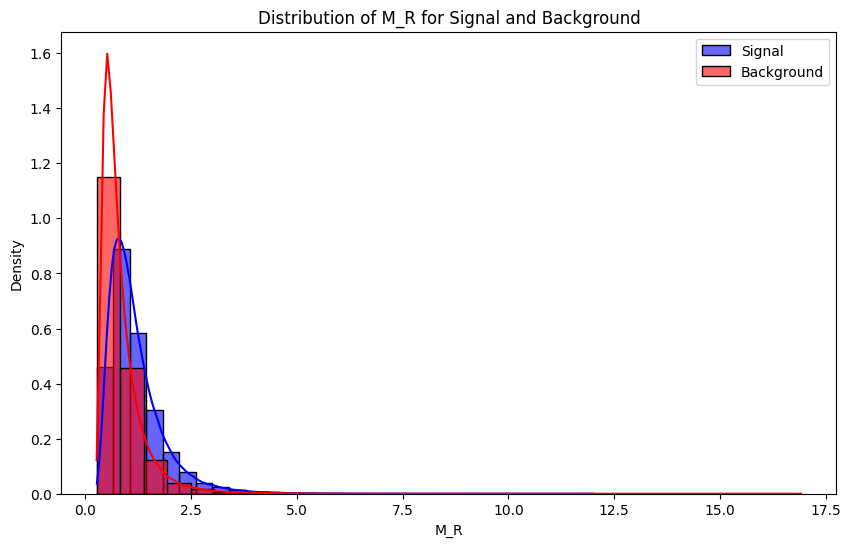

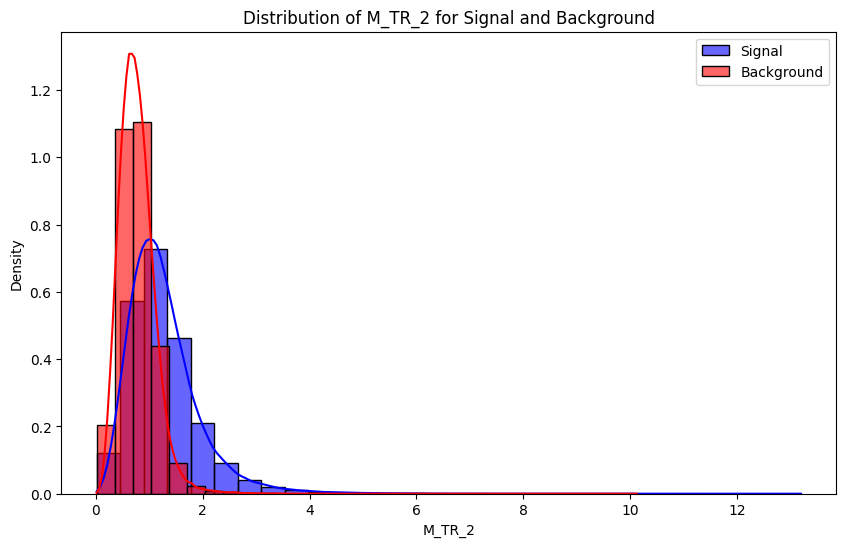

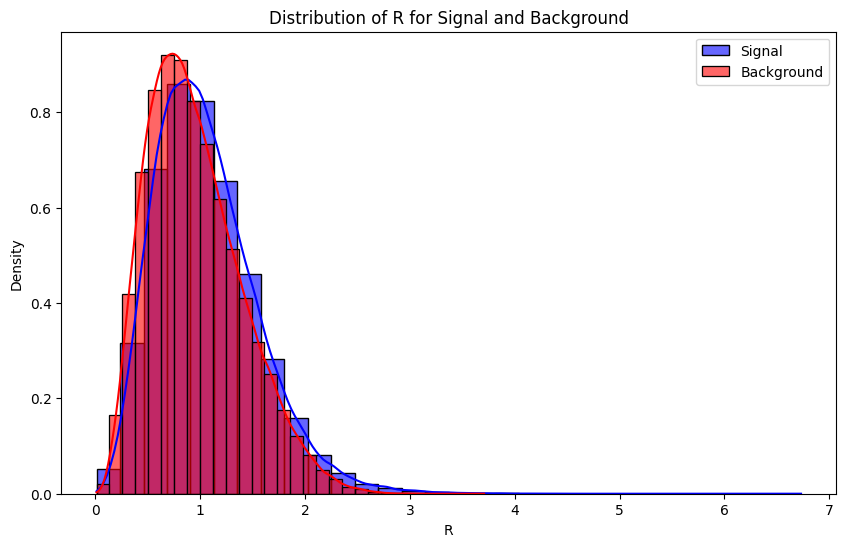

In [25]:
all_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R']
#plot distributions for each feature
for feature in all_features:
    plot_dist(df_sig, df_bkg, feature)

In [26]:
def calculate_efficiencies(df_sig, df_bkg, feature, xc, criterion):
    if criterion == 'x > xc':
        signal_eff = (df_sig[feature] > xc).mean()
        background_eff = (df_bkg[feature] > xc).mean()
    elif criterion == 'x < xc':
        signal_eff = (df_sig[feature] < xc).mean()
        background_eff = (df_bkg[feature] < xc).mean()
    elif criterion == '|x - mu| > xc':
        mu = df_sig[feature].mean()  #(df_sig[feature].mean() + df_bkg[feature].mean()) / 2 for average
        signal_eff = (abs(df_sig[feature] - mu) > xc).mean()
        background_eff = (abs(df_bkg[feature] - mu) > xc).mean()
    elif criterion == '|x - mu| < xc':
        mu = df_sig[feature].mean() 
        signal_eff = (abs(df_sig[feature] - mu) < xc).mean()
        background_eff = (abs(df_bkg[feature] - mu) < xc).mean()
    else:
        print("Unknown criterion.")

    return signal_eff, background_eff

In [27]:
thresholds = np.linspace(0, 3, 50)

results = [] #storing our analysis

for feature in all_features:
    for xc in thresholds:
        for criterion in ['x > xc', 'x < xc', '|x - mu| > xc', '|x - mu| < xc']:
            signal_eff, background_eff = calculate_efficiencies(df_sig, df_bkg, feature, xc, criterion)
            separation = signal_eff - background_eff #remember good separation has high signal_eff and low background_eff
            
            results.append({'feature': feature,
                            'xc': xc,
                            'criterion': criterion,
                            'signal_eff': signal_eff,
                            'background_eff': background_eff,
                            'separation': separation})

#put results into a dataframe
df_results = pd.DataFrame(results)

In [28]:
optimal_criteria = df_results.groupby('feature').apply(lambda x: x.loc[x['separation'].idxmax()])

print("Optimal criteria for each feature:")
print("")
print(optimal_criteria[['feature', 'xc', 'criterion', 'signal_eff', 'background_eff', 'separation']])

Optimal criteria for each feature:

             feature        xc      criterion  signal_eff  background_eff  \
feature                                                                     
MET              MET  0.979592         x > xc    0.588811        0.164599   
MET_rel      MET_rel  1.408163         x > xc    0.359406        0.137693   
M_R              M_R  0.795918         x > xc    0.698314        0.385596   
M_TR_2        M_TR_2  1.040816         x > xc    0.582202        0.178261   
R                  R  0.857143         x > xc    0.616083        0.526771   
axial_MET  axial_MET  0.734694  |x - mu| > xc    0.478588        0.137504   
l_1_eta      l_1_eta  0.979592  |x - mu| < xc    0.718960        0.540526   
l_1_pT        l_1_pT  0.857143         x > xc    0.667753        0.258677   
l_1_phi      l_1_phi  0.612245  |x - mu| < xc    0.354660        0.352551   
l_2_eta      l_2_eta  0.979592  |x - mu| < xc    0.698942        0.543931   
l_2_pT        l_2_pT  0.918367         x

/tmp/ipykernel_321/3720805486.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  optimal_criteria = df_results.groupby('feature').apply(lambda x: x.loc[x['separation'].idxmax()])


In [29]:
#5.2
#resetting index to make 'feature' a column
optimal_criteria.reset_index(drop=True, inplace=True)
print(optimal_criteria)

      feature        xc      criterion  signal_eff  background_eff  separation
0         MET  0.979592         x > xc    0.588811        0.164599    0.424212
1     MET_rel  1.408163         x > xc    0.359406        0.137693    0.221713
2         M_R  0.795918         x > xc    0.698314        0.385596    0.312718
3      M_TR_2  1.040816         x > xc    0.582202        0.178261    0.403942
4           R  0.857143         x > xc    0.616083        0.526771    0.089312
5   axial_MET  0.734694  |x - mu| > xc    0.478588        0.137504    0.341084
6     l_1_eta  0.979592  |x - mu| < xc    0.718960        0.540526    0.178434
7      l_1_pT  0.857143         x > xc    0.667753        0.258677    0.409076
8     l_1_phi  0.612245  |x - mu| < xc    0.354660        0.352551    0.002109
9     l_2_eta  0.979592  |x - mu| < xc    0.698942        0.543931    0.155011
10     l_2_pT  0.918367         x > xc    0.501167        0.305919    0.195248
11    l_2_phi  0.489796  |x - mu| > xc    0.719191  

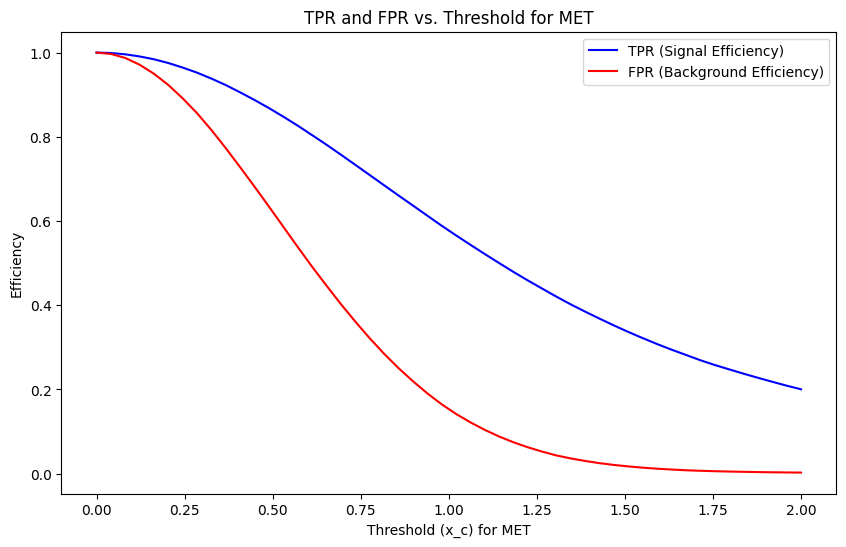

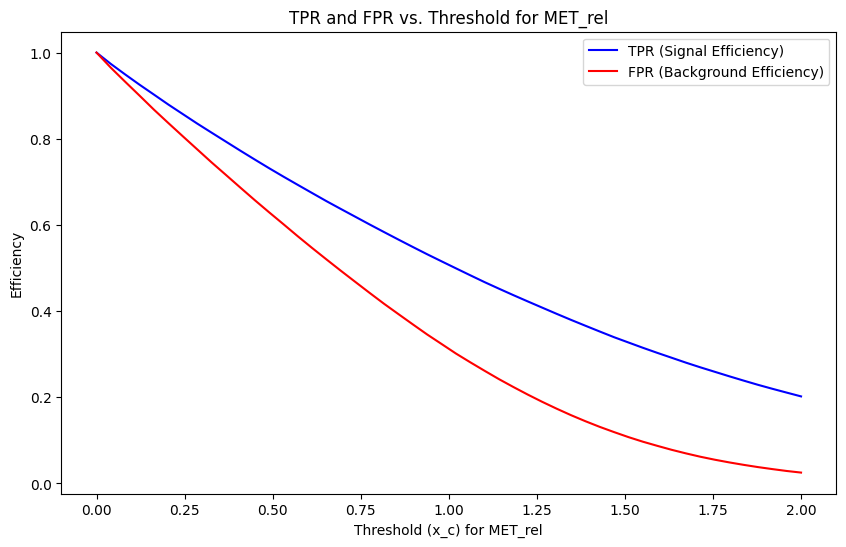

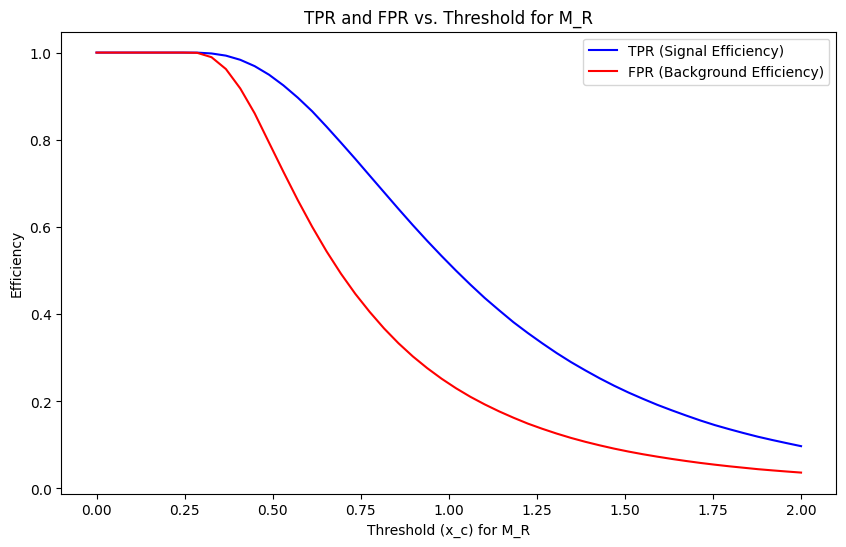

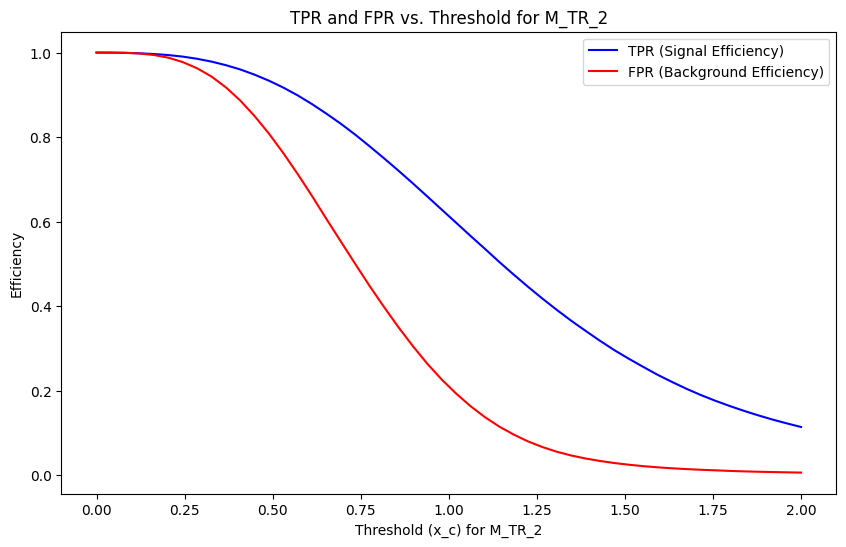

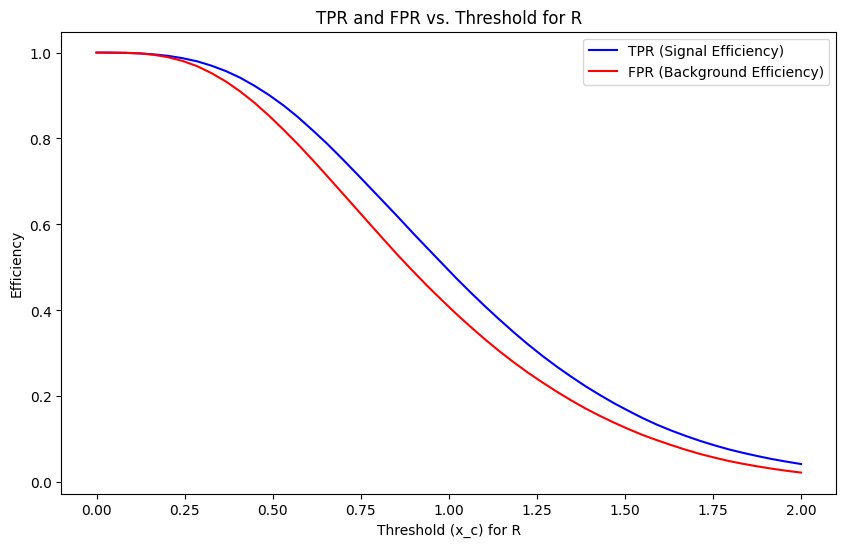

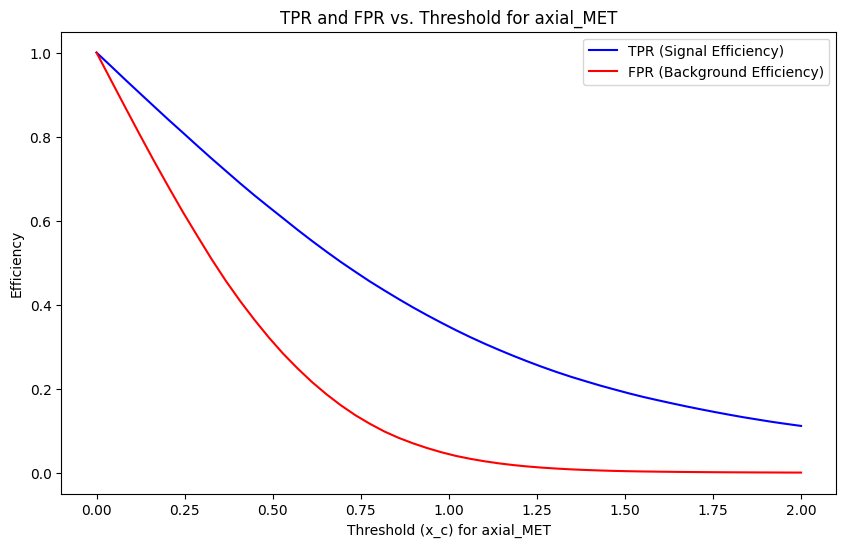

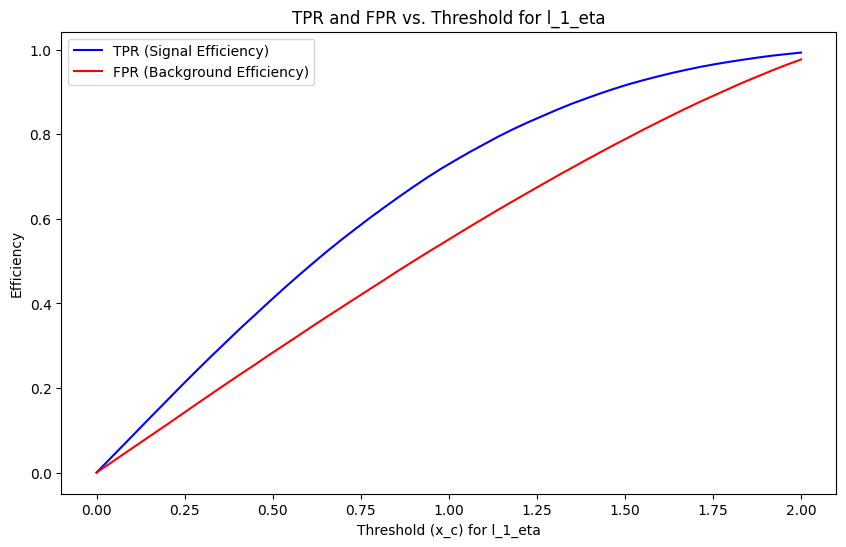

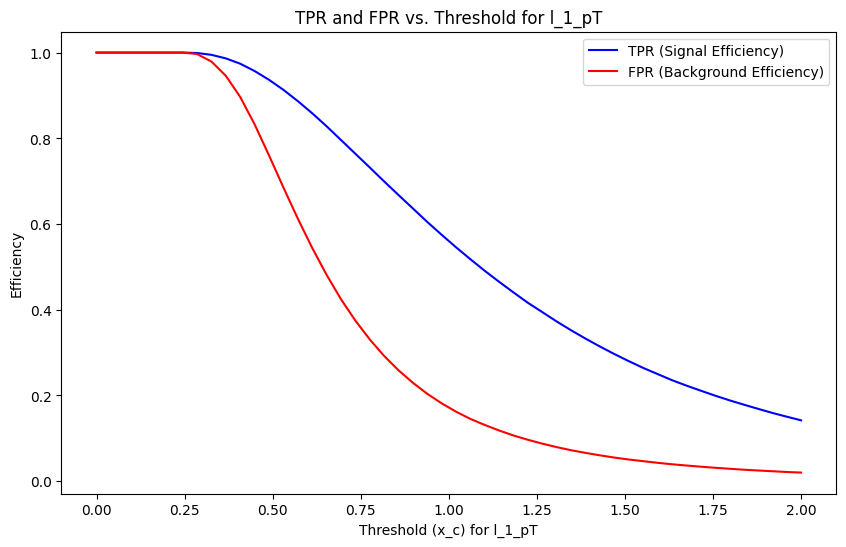

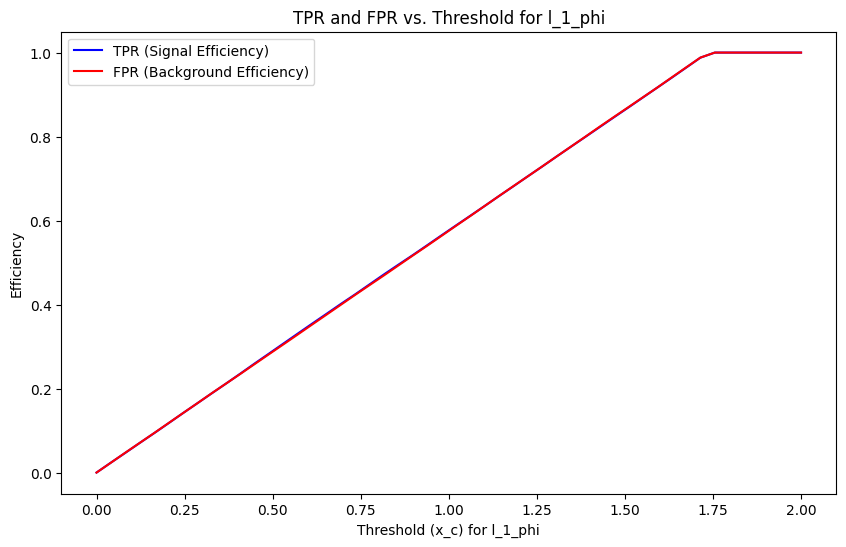

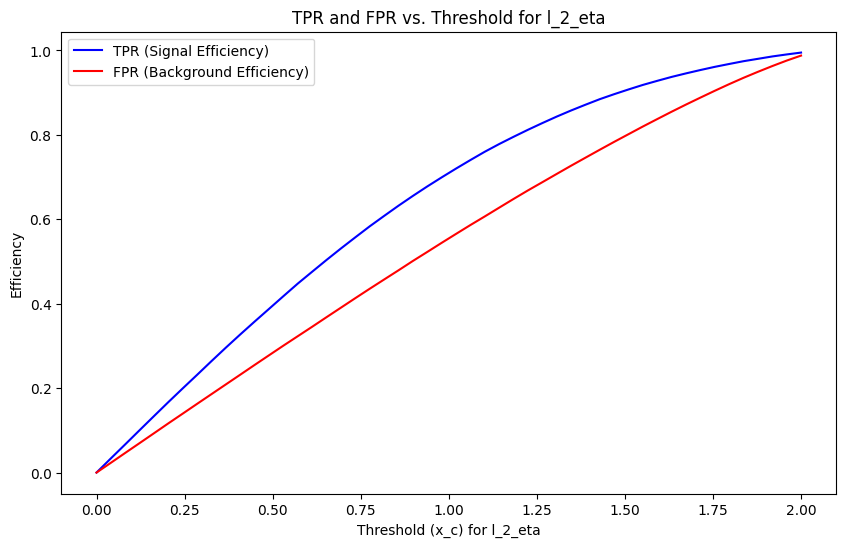

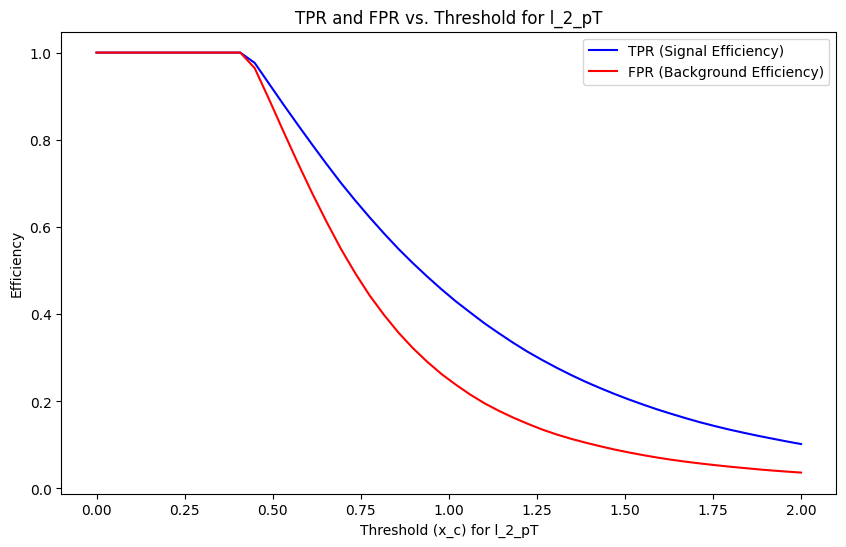

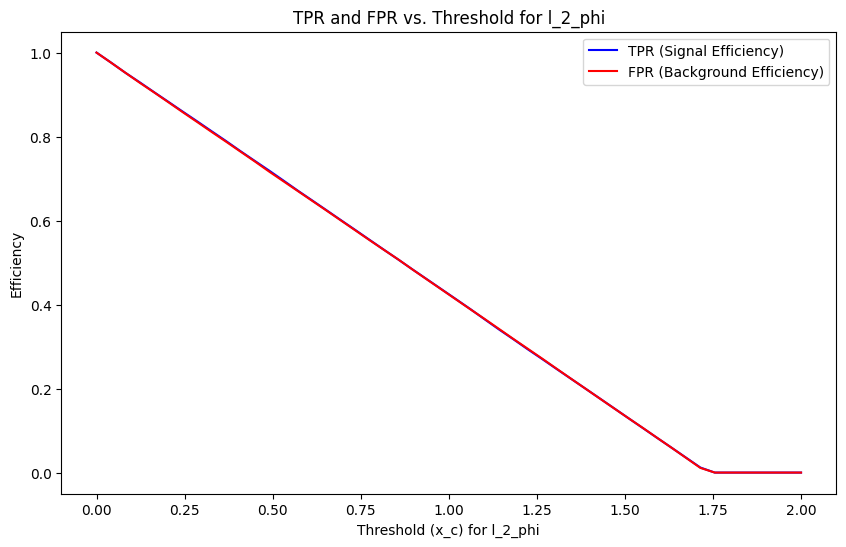

In [30]:
xc_values = np.linspace(0, 2, 50) 

#Loop through each feature in optimal criteria
for index, row in optimal_criteria.iterrows():
    feature = row['feature']
    criterion = row['criterion']
    
    #store TPR and FPR values for each threshold
    tpr_values = []
    fpr_values = []
    
    #mean for |x - mu| based criteria
    mu_signal = signal_stats.loc[feature, 'mean']
    
    #loop for  x_c in the range
    for xc in xc_values:
        #apply criterion based on the optimal criterion for the feature
        if criterion == "x > xc":
            tpr = (df_sig[feature] > xc).mean() 
            fpr = (df_bkg[feature] > xc).mean() 
        elif criterion == "x < xc":
            tpr = (df_sig[feature] < xc).mean()
            fpr = (df_bkg[feature] < xc).mean()
        elif criterion == "|x - mu| > xc":
            tpr = (np.abs(df_sig[feature] - mu_signal) > xc).mean()
            fpr = (np.abs(df_bkg[feature] - mu_signal) > xc).mean()
        elif criterion == "|x - mu| < xc":
            tpr = (np.abs(df_sig[feature] - mu_signal) < xc).mean()
            fpr = (np.abs(df_bkg[feature] - mu_signal) < xc).mean()
        
#storing TPR and FPR values
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(xc_values, tpr_values, label='TPR (Signal Efficiency)', color='blue')
    plt.plot(xc_values, fpr_values, label='FPR (Background Efficiency)', color='red')
    plt.xlabel(f'Threshold (x_c) for {feature}')
    plt.ylabel('Efficiency')
    plt.title(f'TPR and FPR vs. Threshold for {feature}')
    plt.legend()
    plt.show()

In [ ]:
#5.3

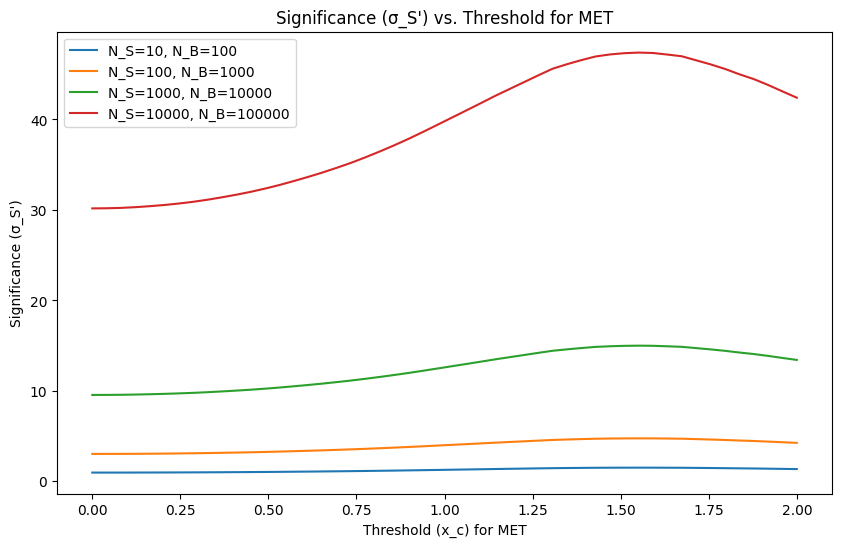

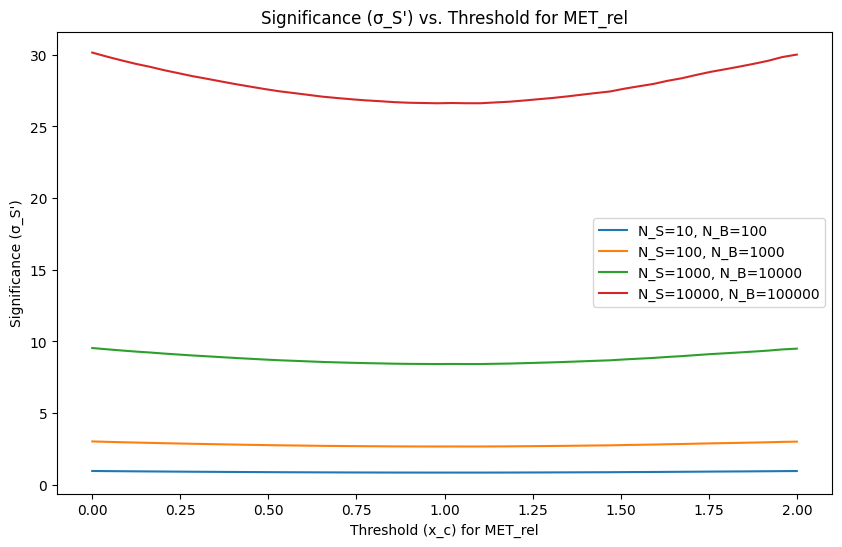

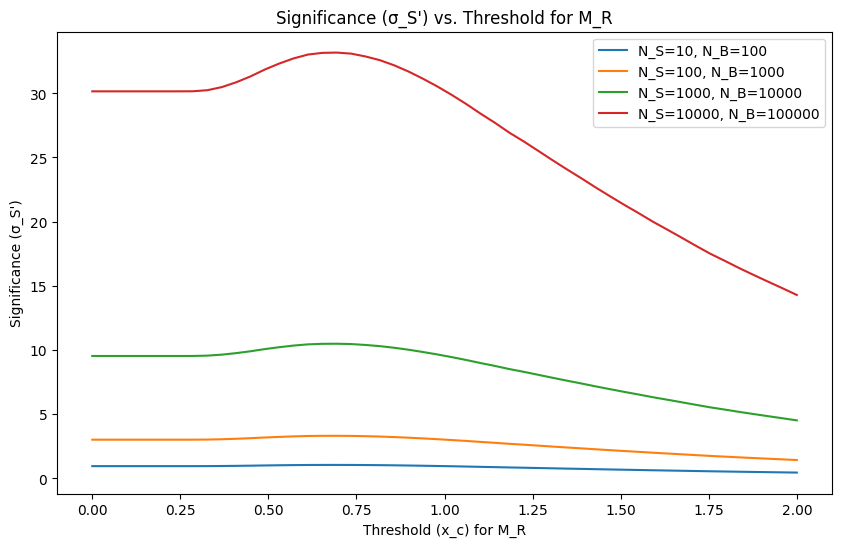

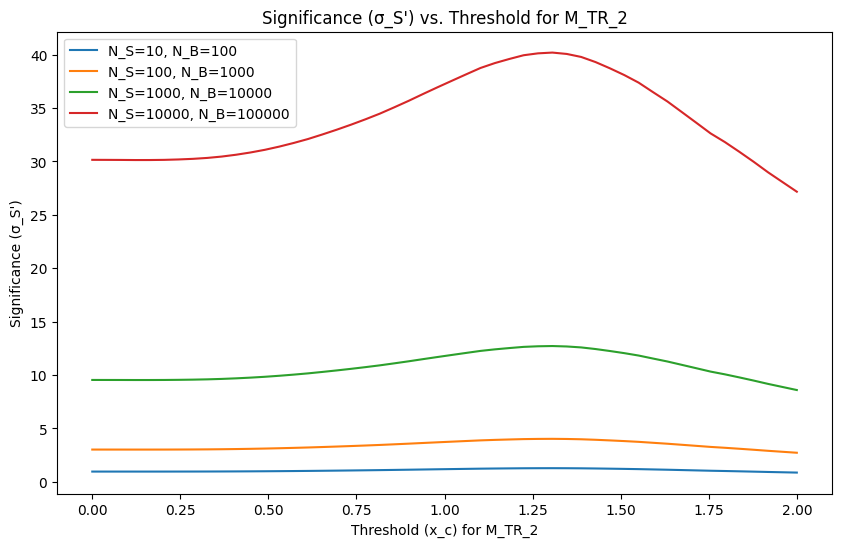

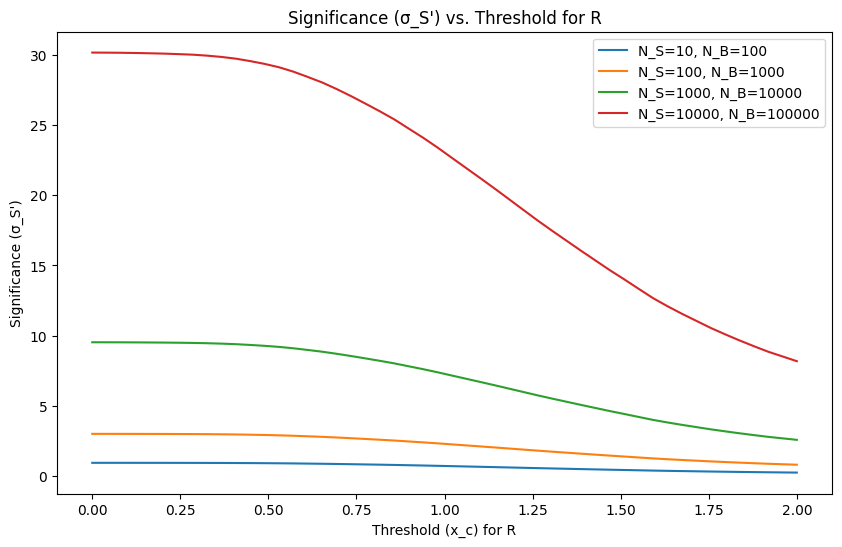

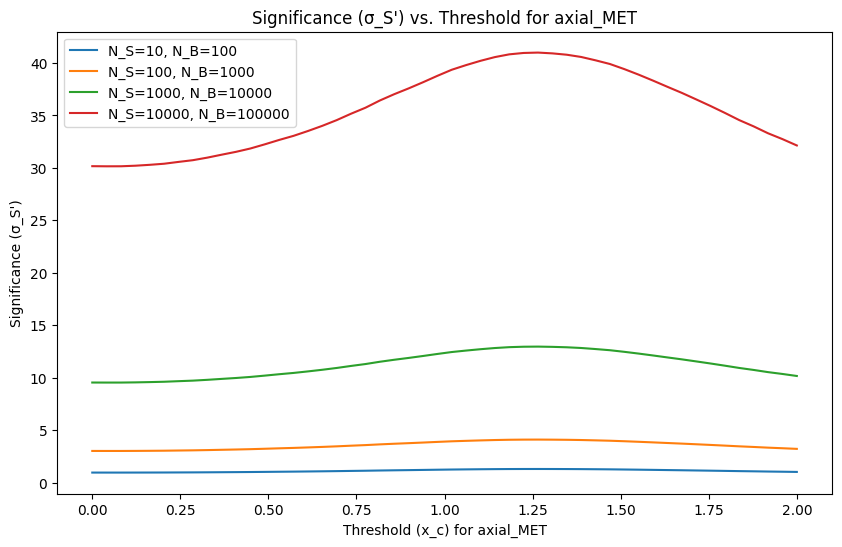

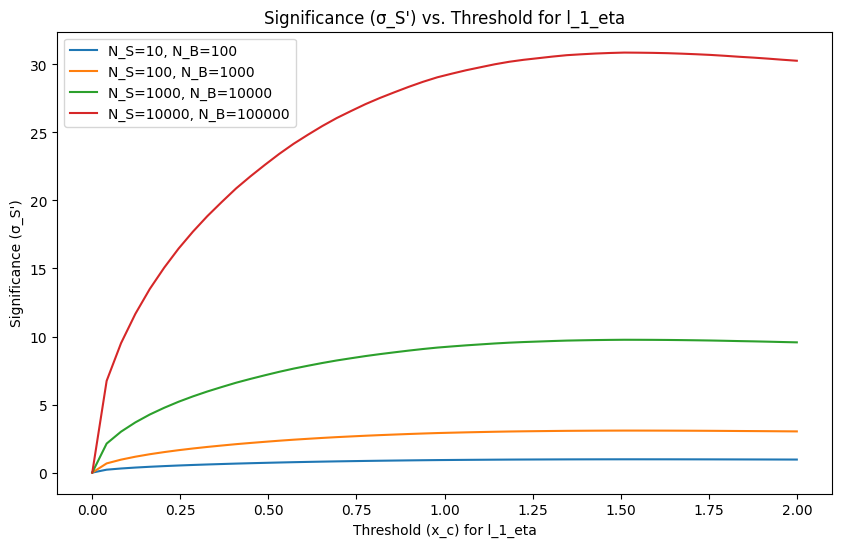

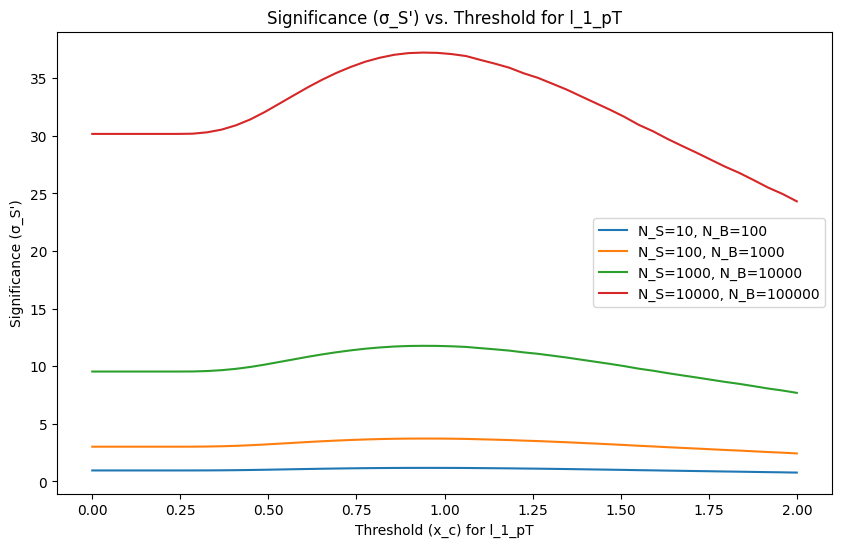

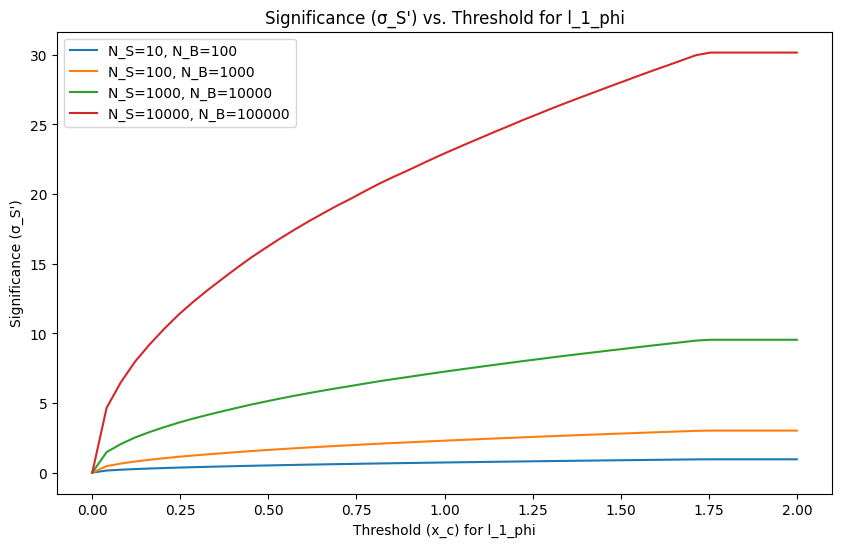

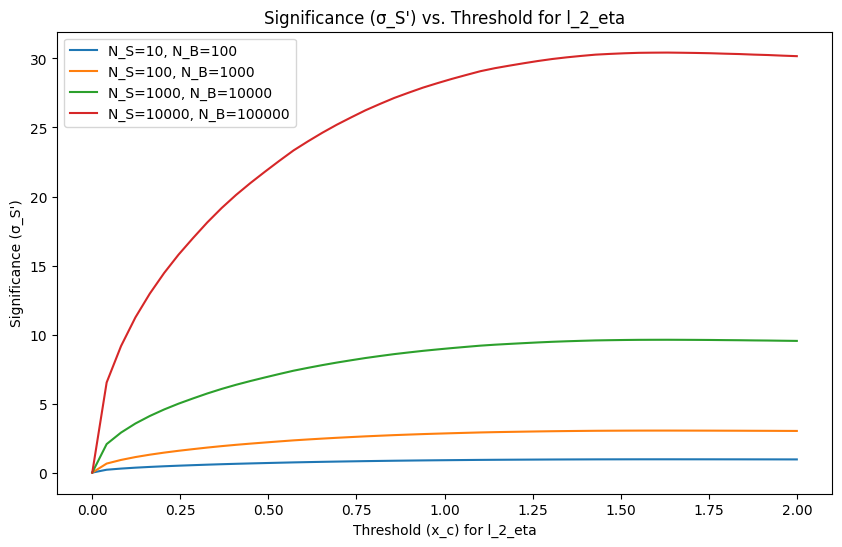

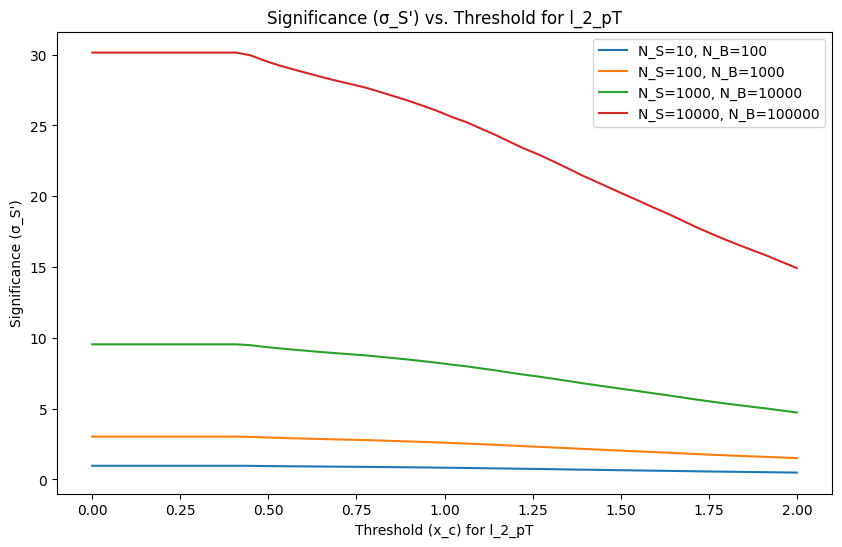

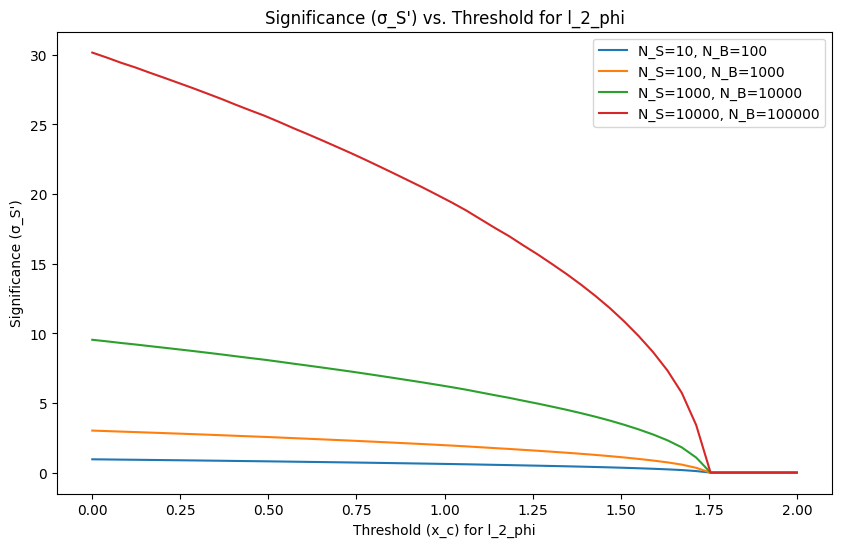

In [31]:
#scenarios for signal count N_S and N_B background count
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

#iterating for out optimal criteria
for index, row in optimal_criteria.iterrows():
    feature = row['feature']
    criterion = row['criterion']
    
    plt.figure(figsize=(10, 6))

    #mean for |x - mu| 
    mu_signal = signal_stats.loc[feature, 'mean']
    
    #loop for each scenario
    for N_S, N_B in scenarios:
        sig_values = [] # Lists to store significance values for each threshold x_c

    #TPR and FPR across the same x_c values from 5.2
        tpr_values = []
        fpr_values = []
        for xc in xc_values:
            #selection criterion based on the optimal criterion for the feature
            if criterion == "x > xc":
                tpr = (df_sig[feature] > xc).mean() #Signal efficiency
                fpr = (df_bkg[feature] > xc).mean() #Background efficiency
            elif criterion == "x < xc":
                tpr = (df_sig[feature] < xc).mean()
                fpr = (df_bkg[feature] < xc).mean()
            elif criterion == "|x - mu| > xc":
                tpr = (np.abs(df_sig[feature] - mu_signal) > xc).mean()
                fpr = (np.abs(df_bkg[feature] - mu_signal) > xc).mean()
            elif criterion == "|x - mu| < xc":
                tpr = (np.abs(df_sig[feature] - mu_signal) < xc).mean()
                fpr = (np.abs(df_bkg[feature] - mu_signal) < xc).mean()
            
            #calculate effective counts N'_S and N'_B
            N_prime_S = tpr * N_S
            N_prime_B = fpr * N_B
            
            #calculate the significance
            if (N_prime_S + N_prime_B) > 0:
                sigma_S_prime = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
            else:
                sigma_S_prime = 0 #no division by 0
            
            #append to significance list
            sig_values.append(sigma_S_prime)
        
        #plot the significance for each scenario
        plt.plot(xc_values, sig_values, label=f'N_S={N_S}, N_B={N_B}')

    plt.xlabel(f'Threshold (x_c) for {feature}')
    plt.ylabel('Significance (σ_S\')')
    plt.title(f'Significance (σ_S\') vs. Threshold for {feature}')
    plt.legend()
    plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [32]:
#6.1 
def compute_cut_flow(df_sig, df_bkg, feature, criterion, xc, N_S, N_B, mu_signal=None):
    #selection based on the criterion
    if criterion == "x > xc":
        signal_pass = df_sig[feature] > xc
        background_pass = df_bkg[feature] > xc
    elif criterion == "x < xc":
        signal_pass = df_sig[feature] < xc
        background_pass = df_bkg[feature] < xc
    elif criterion == "|x - mu| > xc":
        signal_pass = np.abs(df_sig[feature] - mu_signal) > xc
        background_pass = np.abs(df_bkg[feature] - mu_signal) > xc
    elif criterion == "|x - mu| < xc":
        signal_pass = np.abs(df_sig[feature] - mu_signal) < xc
        background_pass = np.abs(df_bkg[feature] - mu_signal) < xc

    #efficiencies and effective counts
    epsilon_S = signal_pass.mean() #signal efficiency
    epsilon_B = background_pass.mean() #background efficiency
    N_prime_S = epsilon_S * N_S #effective signal count
    N_prime_B = epsilon_B * N_B #effective background count
    sigma_S_prime = N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0

    return epsilon_S, epsilon_B, N_prime_S, N_prime_B, sigma_S_prime

In [33]:
#Scenario: (N_S, N_B)
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

#selected ft from part 5.3
selected_features = [{"feature": "MET", "xc": 0.979592, "criterion": "x > xc"},
                     {"feature": "M_R", "xc": 0.795918, "criterion": "x > xc"},
                     {"feature": "l_1_pT", "xc": 0.857143, "criterion": "x > xc"}, ]

#cut-flow table
cut_flow_table = []

#cut flow table for each scenario
for N_S, N_B in scenarios:
    print(f"\nScenario: N_S={N_S}, N_B={N_B}")
    scenario_cut_flow = [] #store the cut-flow for this scenario
    
    #apply selections step by step for each feature
    for feature_info in selected_features:
        feature = feature_info['feature']
        xc = feature_info['xc']
        criterion = feature_info['criterion']
        
        #compute the quantities for this feature's selection
        epsilon_S, epsilon_B, N_prime_S, N_prime_B, sigma_S_prime = compute_cut_flow(
            df_sig, df_bkg, feature, criterion, xc, N_S, N_B, mu_signal=signal_stats.loc[feature, 'mean'])
        
        #store the results
        scenario_cut_flow.append({
            "Feature": feature,
            "xc": xc,
            "Criterion": criterion,
            "epsilon_S": epsilon_S,
            "epsilon_B": epsilon_B,
            "N'_S": N_prime_S,
            "N'_B": N_prime_B,
            "sigma_S'": sigma_S_prime})
    
    #the overall table
    cut_flow_table.append(scenario_cut_flow)

#convert the cut-flow table into DataFrame
cut_flow_df = pd.DataFrame(cut_flow_table[0]) #starts off with the first scenario
print(cut_flow_df)


Scenario: N_S=10, N_B=100

Scenario: N_S=100, N_B=1000

Scenario: N_S=1000, N_B=10000

Scenario: N_S=10000, N_B=100000
  Feature        xc Criterion  epsilon_S  epsilon_B      N'_S       N'_B  \
0     MET  0.979592    x > xc   0.588811   0.164599  5.888111  16.459899   
1     M_R  0.795918    x > xc   0.698314   0.385596  6.983140  38.559583   
2  l_1_pT  0.857143    x > xc   0.667753   0.258677  6.677528  25.867666   

   sigma_S'  
0  1.245537  
1  1.034764  
2  1.170502  


In [ ]:
#PART C

In [38]:
import numpy as np
import pandas as pd

def optimize_with_corr(df_sig, df_bkg, feature1, criterion1, xc1, feature2, criterion2, xc2, N_S, N_B, mu_signal=None):
    if criterion1 == "x > xc":
        signal_pass1 = df_sig[feature1] > xc1
        background_pass1 = df_bkg[feature1] > xc1
    elif criterion1 == "x < xc":
        signal_pass1 = df_sig[feature1] < xc1
        background_pass1 = df_bkg[feature1] < xc1
    elif criterion1 == "|x - mu| > xc":
        signal_pass1 = np.abs(df_sig[feature1] - mu_signal) > xc1
        background_pass1 = np.abs(df_bkg[feature1] - mu_signal) > xc1
    elif criterion1 == "|x - mu| < xc":
        signal_pass1 = np.abs(df_sig[feature1] - mu_signal) < xc1
        background_pass1 = np.abs(df_bkg[feature1] - mu_signal) < xc1

    df_sig_filtered = df_sig[signal_pass1]
    df_bkg_filtered = df_bkg[background_pass1]

    #significance after the first selection
    epsilon_S1, epsilon_B1, N_prime_S1, N_prime_B1, sigma_S_prime1 = compute_cut_flow(
        df_sig, df_bkg, feature1, criterion1, xc1, N_S, N_B, mu_signal=mu_signal)

    #second selection on feature2 using the filtered data
    epsilon_S2, epsilon_B2, N_prime_S2, N_prime_B2, sigma_S_prime2 = compute_cut_flow(
        df_sig_filtered, df_bkg_filtered, feature2, criterion2, xc2, N_prime_S1, N_prime_B1, mu_signal=mu_signal)

    return sigma_S_prime1, sigma_S_prime2

In [39]:
#scenario 1:
sigma1, sigma2 = optimize_with_corr(df_sig, df_bkg, 'MET', 'x > xc', 0.979592, 'M_R', 'x > xc', 0.795918, 1000, 10000)
print(f"Order 1 (MET first, M_R second): Sigma 1 = {sigma1}, Sigma 2 = {sigma2}")

#scenario 2:
sigma1, sigma2 = optimize_with_corr(df_sig, df_bkg, 'M_R', 'x > xc', 0.795918, 'MET', 'x > xc', 0.979592, 1000, 10000)
print(f"Order 2 (M_R first, MET second): Sigma 1 = {sigma1}, Sigma 2 = {sigma2}")

Order 1 (MET first, M_R second): Sigma 1 = 12.455367802723886, Sigma 2 = 12.919035872780759
Order 2 (M_R first, MET second): Sigma 1 = 10.347638978362282, Sigma 2 = 12.919035872780755


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [40]:
#7.1
!pip install scikit-learn

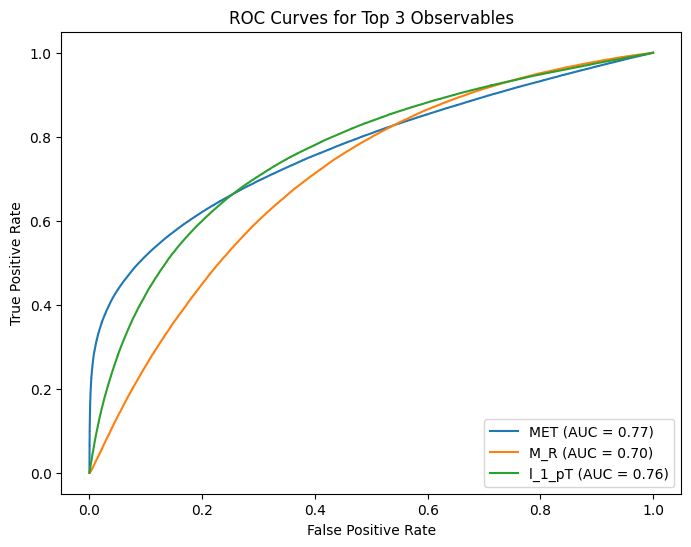

In [42]:
from sklearn.metrics import roc_curve, auc
#our 3 features
top_features = ['MET', 'M_R', 'l_1_pT']

# Prepare figure
plt.figure(figsize=(8, 6))

#loop to plot for ROC
for feature in top_features:
    data = pd.concat([df_sig[feature], df_bkg[feature]])
    labels = [1] * len(df_sig) + [0] * len(df_bkg)
    
    #ROC curve
    fpr, tpr, _ = roc_curve(labels, data)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Observables')
plt.legend(loc='lower right')
plt.show()

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [57]:
print(df_sig.head())
print(df_bkg.head())

   signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
1     1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2     1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3     1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4     1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
8     1.0  2.112812  0.742983 -0.330539  0.805253 -0.028887 -1.446679   

        MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
1  3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2  1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3  2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4  1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
8  2.299946  1.450429  2.989110  -1.894770  1.445125  2.548166  1.564721   

        MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
1  0.000000  0.448410   0.205356  1.321893   

In [58]:
def compute_cov(df_sig, df_bkg):
    #mean for signal and background
    m_signal = df_sig.drop(columns="signal").mean(axis=0)
    m_background = df_bkg.drop(columns="signal").mean(axis=0)
    
    #between-class covariance matrix, S_B
    S_B = np.outer(m_background - m_signal, m_background - m_signal)
    
    #covariance for the signal and background datasets
    S_W_signal = np.cov(df_sig.drop(columns="signal").T) #transpose so features are in rows
    S_W_background = np.cov(df_bkg.drop(columns="signal").T)
    
    #total within-class covariance matrix, S_W = sum of the two
    S_W = S_W_signal + S_W_background
    
    return S_B, S_W, m_signal, m_background

In [60]:
S_B, S_W, m_signal, m_background = compute_cov(df_sig, df_bkg)

In [61]:
#linear coeeficients
def compute_linear_coeff(S_W, m_signal, m_background):
    #inverse of the within-class covariance matrix
    S_W_inv = np.linalg.inv(S_W)
    
    #linear discriminant coefficients
    w = np.dot(S_W_inv, (m_background - m_signal))
    
    return w

In [62]:
w = compute_linear_coeff(S_W, m_signal, m_background)
print(f"Linear Coefficients (w): {w}")

Linear Coefficients (w): [-5.51953603e-01 -1.49592604e-03 -5.36441310e-04 -2.58233784e-01
 -9.61218676e-04 -5.58150589e-04 -3.72523208e-01 -7.09488384e-04
 -3.08840792e-02 -6.32550878e-02  1.17419633e-01 -1.14551650e-02
  5.10415184e-01  7.72434820e-02  3.92203756e-01 -4.28416949e-01
  7.58014907e-03 -1.27524086e+00]


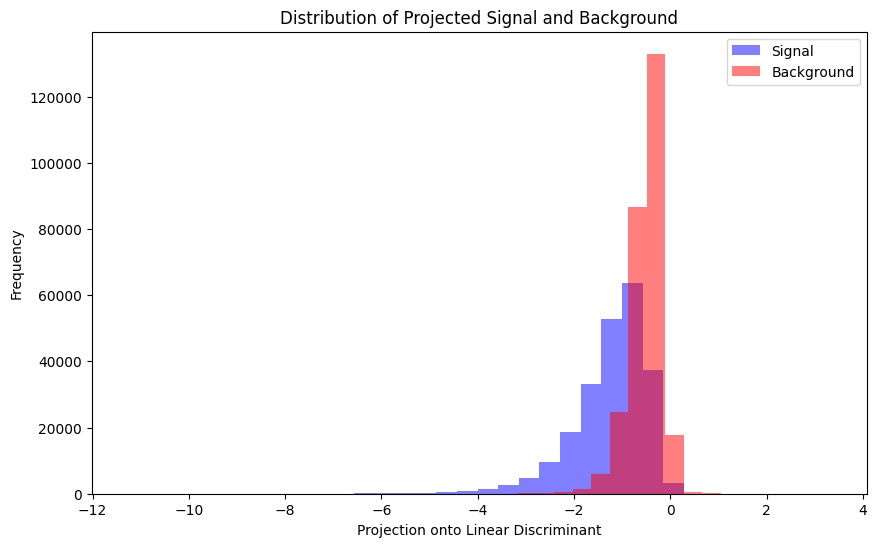

In [63]:
#project the signal and background data onto w
proj_sig = np.dot(df_sig.drop(columns="signal"), w)
proj_bkg = np.dot(df_bkg.drop(columns="signal"), w)

plt.figure(figsize=(10, 6))
plt.hist(proj_sig, bins=30, alpha=0.5, label='Signal', color='blue')
plt.hist(proj_bkg, bins=30, alpha=0.5, label='Background', color='red')
plt.xlabel('Projection onto Linear Discriminant')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Projected Signal and Background')
plt.show()

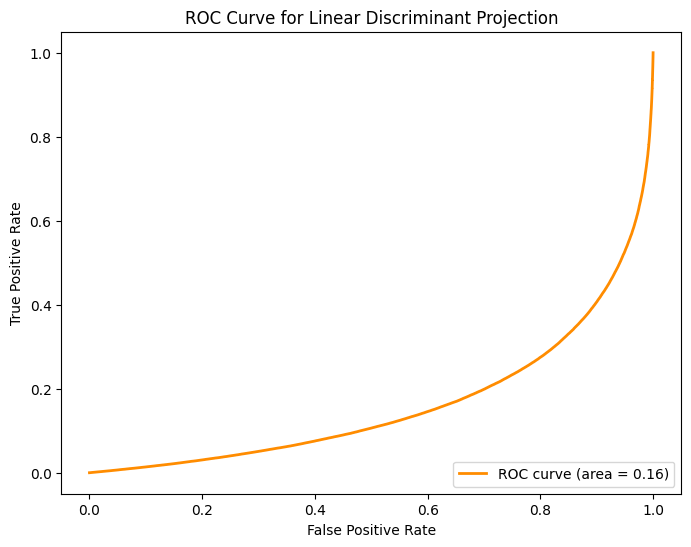

In [65]:
#combine projections and labels for ROC calculation
projections = np.concatenate([proj_sig, proj_bkg])
labels = np.concatenate([np.ones(len(proj_sig)), np.zeros(len(proj_bkg))])

#ROC curve
fpr, tpr, thresholds = roc_curve(labels, projections)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear Discriminant Projection')
plt.legend(loc="lower right")
plt.show()

In [67]:
#significance for each threshold and find the maximum
max_sig = 0
optimal_threshold = 0

for threshold in thresholds:
    S = np.sum(proj_sig >= threshold)
    B = np.sum(proj_bkg >= threshold)
    if S + B > 0: #no division by zero
        significance = S / np.sqrt(S + B)
        if significance > max_significance:
            max_significance = significance
            optimal_threshold = threshold

print(f"Maximal Significance: {max_sig:.3f} at threshold: {optimal_threshold:.3f}")

Maximal Significance: 0.000 at threshold: -11.282
